# Generate onsets for AssocPlace fmri

In [1]:
import pandas as pd
import moss
from scipy import stats
import scipy as sp
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os.path as op
import os

from ap_setup_project import *

# for plotting
sns.set(style='ticks', context='poster', font_scale=1.3)
%matplotlib inline

/Users/sgagnon/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
dirs = dict()
dirs['basedir'] = op.join(op.expanduser('~'), 'Experiments/AssocPlace')
dirs['datadir'] = op.join(dirs['basedir'], 'data/')
dirs['analydir'] = op.join(dirs['basedir'], 'analysis')
dirs['subj_info_file'] = op.join(dirs['datadir'], 'group_info.csv')

In [6]:
exp = gather_experiment_info(exp_name='AP', dirs=dirs)

In [7]:
subj_info = pd.read_csv(dirs['subj_info_file'])
subj_info.head()

,subid,group,gender,remove,anxious,happy,safe,stressed,life_stress,sleep,net_neg,neg,pos,negative,positive
0,ap100,control-fmri,male,NaN,3,2,3,3,4,4.5,1,3.0,2.5,3.0,2.5
1,ap101,control-fmri,male,NaN,2,5,6,2,2,8.5,-7,2.0,5.5,2.0,5.5
2,ap102,control-fmri,male,NaN,4,2,5,5,4,9.0,2,4.5,3.5,4.5,3.5
3,ap103,control-fmri,male,NaN,2,3,5,2,2,6.5,-4,2.0,4.0,2.0,4.0
4,ap104,control-fmri,male,NaN,3,5,6,3,4,8.0,-5,3.0,5.5,3.0,5.5


In [8]:
subj_info = subj_info[pd.isnull(subj_info.remove)]
subj_info = subj_info[subj_info.group.isin(['control-fmri', 'stress-fmri'])]
subj_info

,subid,group,gender,remove,anxious,happy,safe,stressed,life_stress,sleep,net_neg,neg,pos,negative,positive
0,ap100,control-fmri,male,NaN,3,2,3,3,4,4.5000,1,3.0,2.5,3.0,2.5
1,ap101,control-fmri,male,NaN,2,5,6,2,2,8.5000,-7,2.0,5.5,2.0,5.5
2,ap102,control-fmri,male,NaN,4,2,5,5,4,9.0000,2,4.5,3.5,4.5,3.5
3,ap103,control-fmri,male,NaN,2,3,5,2,2,6.5000,-4,2.0,4.0,2.0,4.0
4,ap104,control-fmri,male,NaN,3,5,6,3,4,8.0000,-5,3.0,5.5,3.0,5.5
5,ap105,control-fmri,male,NaN,6,2,5,6,3,8.0000,5,6.0,3.5,6.0,3.5
6,ap106,control-fmri,male,NaN,3,2,3,3,2,8.0000,1,3.0,2.5,3.0,2.5
7,ap107,control-fmri,male,NaN,5,3,3,5,4,6.0000,4,5.0,3.0,5.0,3.0
8,ap108,control-fmri,male,NaN,3,2,3,3,3,7.0000,1,3.0,2.5,3.0,2.5
9,ap109,control-fmri,male,NaN,5,2,7,5,4,10.0000,1,5.0,4.5,5.0,4.5


In [9]:
ds = pd.DataFrame() # study
dt = pd.DataFrame() # test
study = False
test = True

for subid in subj_info.subid:
    print subid
    
    if study:
        # add study file
        study_file = op.join(dirs['datadir'], subid, subid + '_behav_study.csv')
        d = pd.read_csv(study_file)
        d['subid'] = subid
        ds = ds.append(d, ignore_index=True)
    
    if test:
        # add test file
        test_file = op.join(dirs['datadir'], subid, subid + '_behav_freeresp.csv')
        d2 = pd.read_csv(test_file)
        d2['subid'] = subid
        dt = dt.append(d2, ignore_index=True)


ap100
ap101
ap102
ap103
ap104
ap105
ap106
ap107
ap108
ap109
ap110
ap111
ap113
ap114
ap115
ap116
ap117
ap150
ap151
ap152
ap153
ap154
ap155
ap156
ap157
ap159
ap160
ap161
ap162
ap163
ap165
ap166
ap167
ap118
ap119
ap120
ap121
ap122
ap169
ap170
ap172
ap173
ap171
ap158
ap168
ap164
ap174


In [10]:
dt = dt.merge(subj_info, on='subid', how='outer')

In [11]:
dt.groupby(['subid', 'group']).mean().reset_index().groupby('group').count().subid

group
control-fmri    23
stress-fmri     24
Name: subid, dtype: int64

In [12]:
# drop this column so join function doesn't get confused
dt = dt.drop('index',1)

# Split cond to condition and reps
dt['cond_orig'] = dt['cond']
dt = dt.drop('cond', 1)
dt.loc[dt.cond_orig == 'F', 'cond_orig'] = 'F_0'
dt = dt.join(pd.DataFrame(dt.cond_orig.str.split('_').tolist(), columns= ['cond', 'reps']))

#Replace no responses with ISI responses, update RT (change resp last), but only if ISI within a sec after offset
dt.loc[(dt.resp == 'NR') & (dt.ISIrespRT < 1), 'respRT'] = dt.ISIrespRT[(dt.resp == 'NR') & (dt.ISIrespRT < 1)] + 4
dt.loc[(dt.resp == 'NR') & (dt.ISIrespRT < 1), 'acc'] = dt.ISIacc[(dt.resp == 'NR') & (dt.ISIrespRT < 1)]
dt.loc[(dt.resp == 'NR') & (dt.ISIrespRT < 1), 'accSpec'] = dt.ISIaccSpec[(dt.resp == 'NR') & (dt.ISIrespRT < 1)]
dt.loc[(dt.resp == 'NR') & (dt.ISIrespRT < 1), 'resp'] = dt.ISIresp[(dt.resp == 'NR') & (dt.ISIrespRT < 1)]

drop_cols = ['ISIrespRT', 'ISIresp', 'ISIacc', 'ISIaccSpec']
for drop_col in drop_cols:
    dt = dt.drop(drop_col,1)

In [13]:
# Track shock + post trials
shockTrials = pd.Series(dt.shockTrial)
lagged = shockTrials.shift(1) # shift forward one
combined = lagged + shockTrials
dt.loc[:,'shock_and_post'] = combined # merged; shock and post shock = 1 (or 2)
dt.loc[0, 'shock_and_post'] = dt.shockTrial[0] # first trial = first trial since no prev
dt.loc[dt.group == 'control-fmri', 'shock_and_post'] = 0 # set controls to 0
dt.loc[dt.shockCond == 'safe', 'shock_and_post'] = 0 # set safe cond to 0

# reset index 
dt = dt.reset_index()
dt = dt.drop('index',1)

## Convert beach repeats (diff words paired with same beach scene) to nuisance (for onsets)

ERROR: Line magic function `%R` not found.


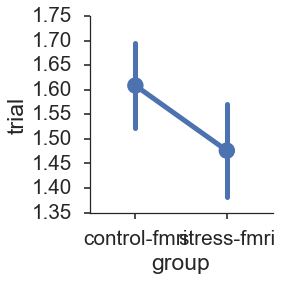

In [14]:
data = dt.loc[dt.associate == 'beach'].groupby(['subid', 'group']).count().reset_index()

sns.factorplot(x='group', y='trial', units='subid', ci=68,
               data=data)

beach_counts = dt.loc[dt.associate == 'beach'].groupby(['subid', 'group']).count().reset_index()
beach_counts.loc[beach_counts.trial == 2].groupby(['group']).count()

sub_list = beach_counts[beach_counts.trial == 2].subid

%R -i beach_counts

In [15]:
len(sub_list)

24

In [16]:
dt.loc[(dt.subid.isin(sub_list)) & 
       (dt.associate == 'beach'), ['acc', 'accSpec']] = 'NR'
dt.loc[(dt.subid.isin(sub_list)) & 
       (dt.associate == 'beach'), ['respRT']] = 999

## Now do some recoding

In [17]:
dt = dt.replace(to_replace='TI', value='indoor')
dt = dt.replace(to_replace='TO', value='outdoor')
dt = dt.replace(to_replace='F', value='foil')
dt = dt.replace(to_replace='NR', value='no response')

# Convert accSpec to acc, split to col for Confidence
dt['accSpec_tosplit'] = dt['accSpec']
dt.loc[dt.accSpec_tosplit == 'CR', 'accSpec_tosplit'] = 'CR_N'
dt.loc[dt.accSpec_tosplit == 'MI', 'accSpec_tosplit'] = 'MI_N'
dt.loc[dt.accSpec_tosplit == 'no response', 'accSpec_tosplit'] = 'no response_N'
dt = dt.join(pd.DataFrame(dt.accSpec_tosplit.str.split('_').tolist(), 
                          columns= ['accSpec2', 'conf']))

# clear out the unneeded cols
dt = dt.drop('accSpec2',1)
dt = dt.drop('accSpec_tosplit',1)

# Adjust onset for 12 sec lead in
dt['onset_adj'] = dt.onset - 12

dt.head()

,run,trial,onset,duration,shockCond,shockTrial,target,associate,resp,acc,...,neg,pos,negative,positive,cond_orig,cond,reps,shock_and_post,conf,onset_adj
0,1,1,12.0191,10.6661,safe,0,BANDIT,cemetery,indoor,SM,...,3.0,2.5,3.0,2.5,TO_4,outdoor,4,0.0,Hi,0.0191
1,1,2,22.7129,9.1242,safe,0,WALRUS,foil,foil,CR,...,3.0,2.5,3.0,2.5,F_0,foil,0,0.0,N,10.7129
2,1,3,31.8642,9.4224,safe,0,VIOLIN,throne_room,indoor,H,...,3.0,2.5,3.0,2.5,TI_2,indoor,2,0.0,Hi,19.8642
3,1,4,41.3132,11.3389,safe,0,MEDAL,hayfield,outdoor,H,...,3.0,2.5,3.0,2.5,TO_2,outdoor,2,0.0,Hi,29.3132
4,1,5,52.6786,9.7644,safe,0,MANURE,canyon,outdoor,H,...,3.0,2.5,3.0,2.5,TO_2,outdoor,2,0.0,Hi,40.6786


## Is RT affected by shock?

In [18]:
dstress = dt.query('group == "stress-fmri"')
dstress['relShock'] = dstress.loc[:,'shockTrial']
for increment in [1,2,3,4,5]:
    dstress['relShock'] = np.nansum([dstress.relShock,
                                     dstress.relShock.apply(lambda x: 0 if x < increment else x+1).shift(1)],
                                    axis=0)
    
dstress.loc[dstress.relShock > 6, 'relShock'] = 1

/Users/sgagnon/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/sgagnon/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/sgagnon/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

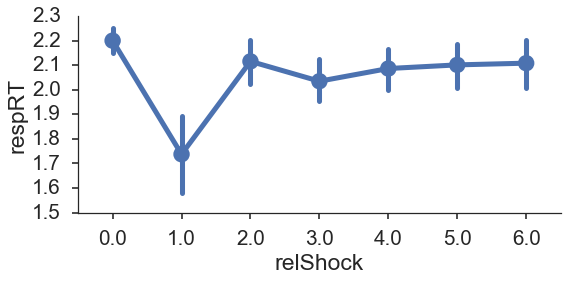

In [19]:
data = dstress.loc[dstress.respRT < 10].groupby(['subid', 'relShock']).respRT.mean().reset_index()
sns.factorplot(x='relShock', y='respRT', units='subid', ci=68, 
               data=data, aspect=2)

### Do # of responses per category differ by group?

In [17]:
data = dt.groupby(['subid', 'group', 'resp']).count().reset_index()
data = data.pivot_table(index=['subid', 'group'], columns='resp', 
                        values='trial', fill_value=0).reset_index()

In [18]:
data.groupby(['group']).mean()

resp,foil,indoor,no response,outdoor
group,,,,
control-fmri,74.086957,86.739130,2.130435,88.478261
stress-fmri,80.541667,83.166667,5.250000,81.291667


In [19]:
sp.stats.ttest_ind(data.loc[data.group == 'control-fmri'].foil, 
                   data.loc[data.group == 'stress-fmri'].foil, 
                   equal_var=True)

Ttest_indResult(statistic=-0.74373737742098367, pvalue=0.46090123033456953)

In [20]:
sp.stats.ttest_ind(data.loc[data.group == 'control-fmri'].indoor, 
                   data.loc[data.group == 'stress-fmri'].indoor, 
                   equal_var=True)

Ttest_indResult(statistic=0.53744597523852833, pvalue=0.59360752273843187)

In [21]:
sp.stats.ttest_ind(data.loc[data.group == 'control-fmri'].outdoor, 
                   data.loc[data.group == 'stress-fmri'].outdoor, 
                   equal_var=True)

Ttest_indResult(statistic=1.162372453759418, pvalue=0.25121186177352789)

In [22]:
sp.stats.ttest_ind(data.loc[data.group == 'control-fmri', 'no response'], 
                   data.loc[data.group == 'stress-fmri', 'no response'], 
                   equal_var=True)

Ttest_indResult(statistic=-1.2751576425139934, pvalue=0.20879776866759336)

### Distribution of ITIs (following 4 sec stim presentation):

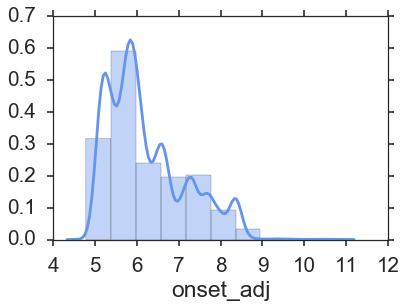

In [23]:
iti_list = dt.onset_adj.diff()[dt.onset_adj.diff() > 0] - 4
sns.distplot(iti_list, bins=10, color='cornflowerblue')

In [24]:
print 'Median: ' + str(iti_list.median())
print 'Mean: ' + str(iti_list.mean())
print 'SD: ' + str(iti_list.std())

Median: 5.9508
Mean: 6.21738171707
SD: 0.923228501239


In [25]:
iti_list.max()

10.743499999999997

In [26]:
iti_list.min()

4.7802000000000078

### Max onset

In [20]:
dt.onset_adj.max()

423.27370000000002

In [28]:
225*2

450

### RTs across all trial types

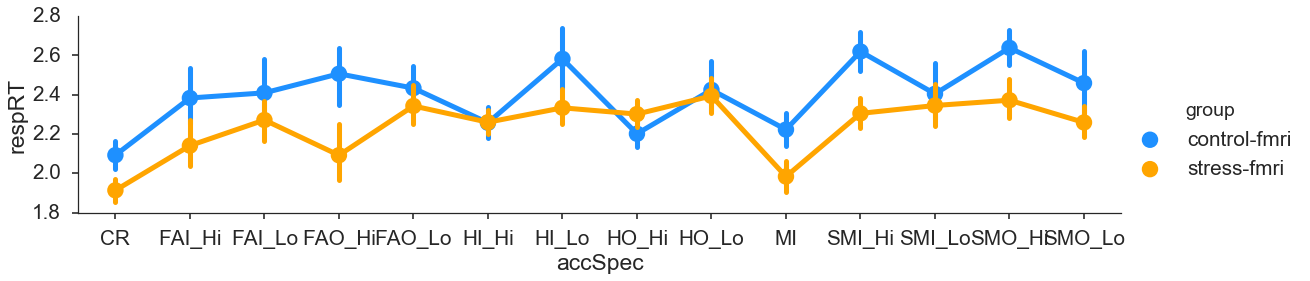

In [29]:
data = dt.groupby(['subid', 'group', 'accSpec', 'respRT']).mean().reset_index()
sns.factorplot('accSpec', 'respRT', aspect=4, hue='group',
               units='subid', ci=68, data=data.query("accSpec != 'no response'"), palette=exp['palette'])

### Broken down by confidence:

In [30]:
dt.accSpec.unique()

array(['SMO_Hi', 'CR', 'HI_Hi', 'HO_Hi', 'MI', 'FAI_Lo', 'FAO_Lo',
       'FAI_Hi', 'SMI_Hi', 'SMI_Lo', 'SMO_Lo', 'HI_Lo', 'HO_Lo',
       'no response', 'FAO_Hi'], dtype=object)

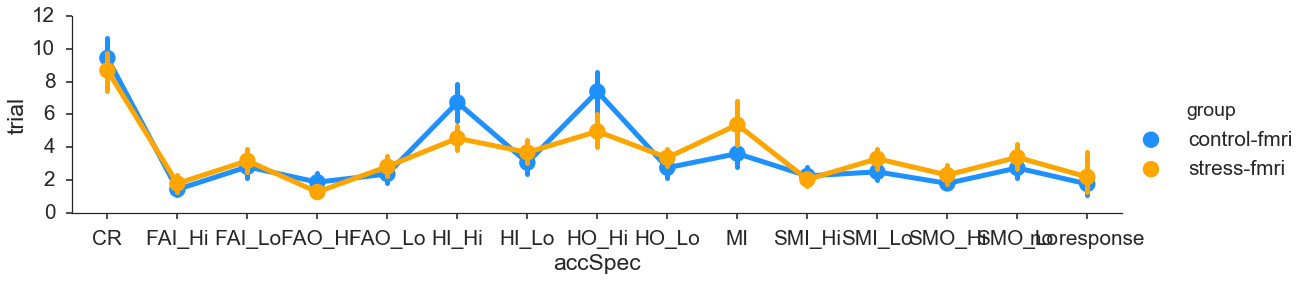

In [31]:
data = dt.groupby(['subid', 'group', 'accSpec', 'run']).count().reset_index()
sns.factorplot('accSpec', 'trial', aspect=4, hue='group',
               units='subid', ci=95, data=data, palette=exp['palette'])

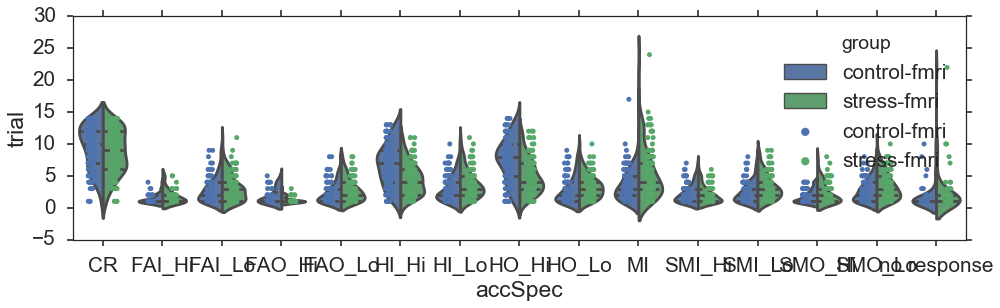

In [32]:
f, ax = plt.subplots(figsize=(16,4))

data = dt.groupby(['subid', 'accSpec', 'group', 'run']).count().reset_index()
sns.violinplot(x='accSpec', y='trial', hue='group', 
               inner='quartile', scale='width', split=True, data=data)

sns.stripplot(x='accSpec', y='trial', hue='group', 
              data=data, split=True, jitter=True)

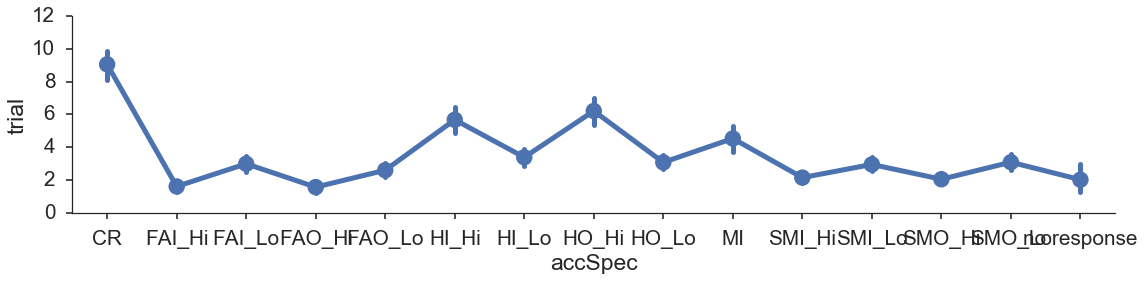

In [33]:
data = dt.groupby(['subid', 'accSpec', 'run']).count().reset_index()
sns.factorplot('accSpec', 'trial', aspect=4,
               units='subid', ci=95, data=data)

In [21]:
dt.loc[dt.shock_and_post == 2, ['subid']]

,subid
6677,ap160


In [22]:
dt['mem_conditions'] = dt.accSpec

dt.loc[dt.mem_conditions.isin(['FAI_Hi', 'FAO_Hi', 'FAI_Lo', 'FAO_Lo']), 'mem_conditions'] = 'FA'
dt.loc[dt.mem_conditions.isin(['MI']), 'mem_conditions'] = 'M'
dt.loc[dt.mem_conditions.isin(['CR']), 'mem_conditions'] = 'CR' #redundant, but just to remember

dt.loc[dt.mem_conditions.isin(['HO_Hi', 'HI_Hi']), 'mem_conditions'] = 'sourcehit'
dt.loc[dt.mem_conditions.isin(['HO_Hi', 'HI_Hi']), 'mem_conditions'] = 'sourcehit'
dt.loc[dt.mem_conditions.isin(['SMO_Hi', 'SMI_Hi']), 'mem_conditions'] = 'sourcemiss_hi'
dt.loc[dt.mem_conditions.isin(['HO_Lo', 'HI_Lo','SMO_Lo', 'SMI_Lo']), 'mem_conditions'] = 'itemhit_lo'

dt.loc[dt.mem_conditions.isin(['no response']), 'mem_conditions'] = 'nuisance'
dt.loc[dt.shock_and_post > 0, 'mem_conditions'] = 'nuisance' # code all shock and post (1,2) as nuisance

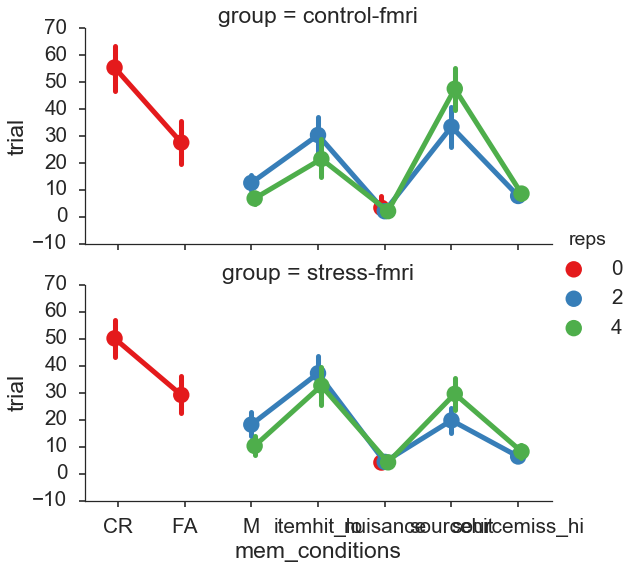

In [36]:
data = dt.groupby(['subid', 'mem_conditions', 'reps','group', 'run']).count().reset_index()
data = data.groupby(['subid', 'mem_conditions', 'reps', 'group']).sum().reset_index()

sns.factorplot(data=data, units='subid', ci=95, x='mem_conditions', 
               y='trial', hue='reps', dodge=0.1, palette='Set1',
              row='group', aspect=2)

### Total trials for a participant

In [37]:
subject_id = 'ap160'

data = dt.groupby(['subid', 'mem_conditions', 'group']).count().reset_index()

# do this to get the actual number per run, include zeros where no trials exist
piv_trials = data.pivot_table(values='trial',index=['group', 'subid'] , columns='mem_conditions',).fillna(0)
data = pd.DataFrame(piv_trials).reset_index()
data = pd.melt(data, id_vars=['subid', 'group'], value_vars=list(dt.mem_conditions.unique()))
data = data.groupby(['subid', 'mem_conditions', 'group']).mean().reset_index()
data[data.subid == subject_id]

,subid,mem_conditions,group,value
224,ap160,CR,stress-fmri,50.0
225,ap160,FA,stress-fmri,16.0
226,ap160,M,stress-fmri,52.0
227,ap160,itemhit_lo,stress-fmri,1.0
228,ap160,nuisance,stress-fmri,55.0
229,ap160,sourcehit,stress-fmri,51.0
230,ap160,sourcemiss_hi,stress-fmri,27.0


### Mean number of trials per condition type per run

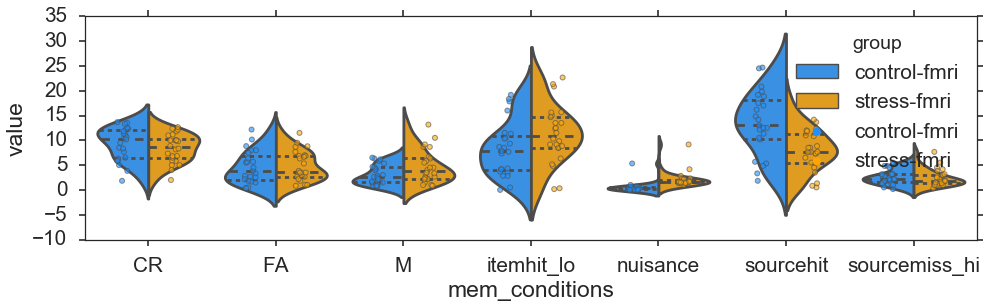

In [38]:
data = dt.groupby(['subid', 'mem_conditions', 'group', 'run']).count().reset_index()

# do this to get the actual number per run, include zeros where no trials exist
piv_trials = data.pivot_table(values='trial',index=['group', 'subid', 'run'] , columns='mem_conditions',).fillna(0)
data = pd.DataFrame(piv_trials).reset_index()
data = pd.melt(data, id_vars=['subid', 'group', 'run'], value_vars=list(dt.mem_conditions.unique()))
data = data.groupby(['subid', 'mem_conditions', 'group']).mean().reset_index()
data.head()

f, ax = plt.subplots(figsize=(16,4))

sns.violinplot(x='mem_conditions', y='value', hue='group', palette=exp['palette'], 
               inner='quartile', scale='width', split=True, data=data)

sns.stripplot(x='mem_conditions', y='value', hue='group', palette=exp['palette'], 
              data=data, split=True, linewidth=1, jitter=True, alpha=.6)

In [39]:
data = dt.groupby(['subid', 'mem_conditions', 'group', 'reps']).count().reset_index()

# do this to get the actual number per run, include zeros where no trials exist
piv_trials = data.pivot_table(values='trial',index=['group', 'subid', 'reps'] , columns='mem_conditions',).fillna(0)
data = pd.DataFrame(piv_trials).reset_index()
data = pd.melt(data, id_vars=['subid', 'group', 'reps'], value_vars=list(dt.mem_conditions.unique()))
data = data.groupby(['subid', 'mem_conditions', 'group', 'reps']).mean().reset_index()
data.loc[(data.reps.isin(['2', '4'])) &
         (data.mem_conditions.isin(['sourcehit'])) &
         (data.value < 5),]

,subid,mem_conditions,group,reps,value
226,ap110,sourcehit,control-fmri,2,3.0
499,ap151,sourcehit,stress-fmri,2,0.0
500,ap151,sourcehit,stress-fmri,4,3.0
604,ap156,sourcehit,stress-fmri,2,2.0
605,ap156,sourcehit,stress-fmri,4,3.0
646,ap158,sourcehit,control-fmri,2,2.0
961,ap173,sourcehit,stress-fmri,2,2.0


### Median RTs

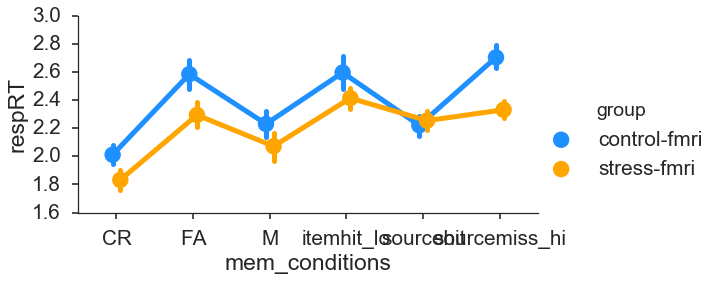

In [40]:
data = dt.groupby(['subid', 'mem_conditions', 'group']).median().reset_index()
data = data.query('mem_conditions != "nuisance"')

sns.factorplot(x='mem_conditions', y='respRT', aspect=2, dodge=0.1,
               hue='group', palette=exp['palette'], 
               units='subid', ci=68, data=data)

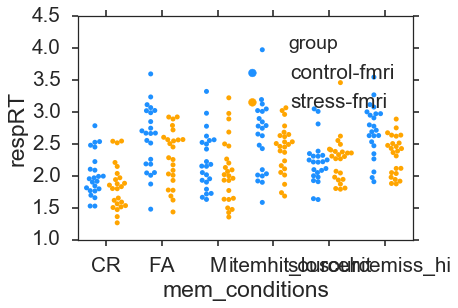

In [41]:
data = dt.groupby(['subid', 'mem_conditions', 'group']).median().reset_index()
data = data.query('mem_conditions != "nuisance"')

sns.swarmplot(x='mem_conditions', y='respRT', split=True,
               hue='group', palette=exp['palette'], 
               data=data)

### Distribition of median RTs

In [42]:
data = dt.groupby(['subid', 'mem_conditions', 'group']).median().reset_index()
data = data.query('mem_conditions != "nuisance"')

data.head()

,subid,mem_conditions,group,run,trial,onset,duration,shockTrial,respRT,remove,good_math,important_math,anxious,happy,safe,stressed,life_stress,sleep,shock_and_post,onset_adj
0,ap100,CR,control-fmri,4.0,20.0,210.5524,9.76050,0.0,1.81080,NaN,5.0,6.0,3.0,2.0,3.0,3.0,4.0,4.5,0.0,198.5524
1,ap100,FA,control-fmri,3.5,16.0,164.8191,10.28665,0.0,2.66770,NaN,5.0,6.0,3.0,2.0,3.0,3.0,4.0,4.5,0.0,152.8191
2,ap100,M,control-fmri,4.0,20.0,206.2807,9.92510,0.0,1.89955,NaN,5.0,6.0,3.0,2.0,3.0,3.0,4.0,4.5,0.0,194.2807
3,ap100,itemhit_lo,control-fmri,5.0,21.0,213.6343,9.92220,0.0,2.78650,NaN,5.0,6.0,3.0,2.0,3.0,3.0,4.0,4.5,0.0,201.6343
5,ap100,sourcehit,control-fmri,3.0,21.0,219.7599,9.93350,0.0,2.09580,NaN,5.0,6.0,3.0,2.0,3.0,3.0,4.0,4.5,0.0,207.7599


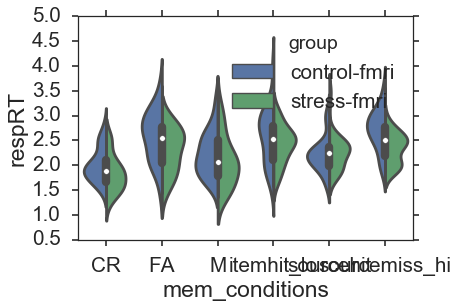

In [43]:
data = dt.groupby(['subid', 'mem_conditions', 'group']).median().reset_index()
data = data.query('mem_conditions != "nuisance"')

sns.violinplot(x='mem_conditions', y='respRT', hue='group', split=True,
               data=data)

In [44]:
dt.mem_conditions.unique()

array(['sourcemiss_hi', 'CR', 'sourcehit', 'M', 'FA', 'itemhit_lo',
       'nuisance'], dtype=object)

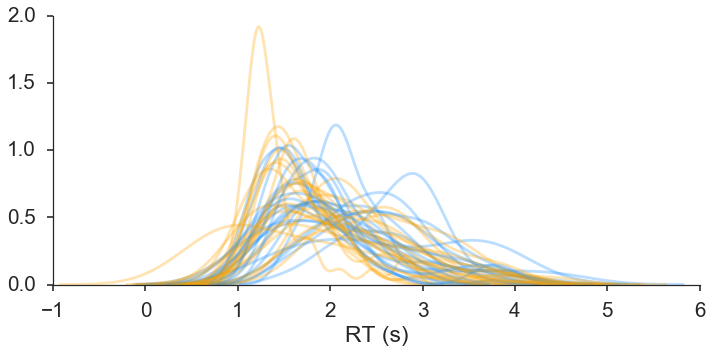

In [45]:
data = dt
condition = 'CR'

r = len(subj_info.subid)
fig, ax = plt.subplots(1,1, figsize=(10,5))

group_data = pd.DataFrame()
for group, sub in zip(subj_info.group, subj_info.subid):
    
    data = dt
    data = data[(data.mem_conditions == condition) &
                (data.subid == sub)]
    
    if group == 'control-fmri':
        color = 'dodgerblue'
    else: 
        color = 'orange'
    
    if data.shape[0] > 4:
        sd = np.std(data.respRT)
        group_data = group_data.append({'subid': sub,
                           'group': group,
                           'sd': sd}, ignore_index=True)

        sns.kdeplot(data.respRT, color=color, legend=False, alpha=.3)
sns.despine()
plt.xlabel('RT (s)')
plt.tight_layout()
    
# plt.savefig('/Users/sgagnon/Desktop/rt_dist.png')

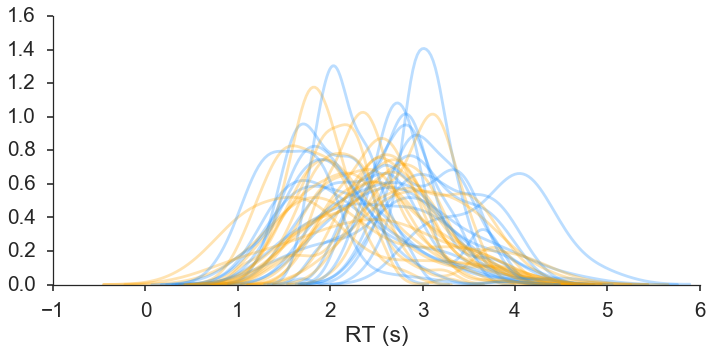

In [46]:
data = dt
condition = 'itemhit_lo'

r = len(subj_info.subid)
fig, ax = plt.subplots(1,1, figsize=(10,5))

group_data = pd.DataFrame()
for group, sub in zip(subj_info.group, subj_info.subid):
    
    data = dt
    data = data[(data.mem_conditions == condition) &
                (data.subid == sub)]
    
    if group == 'control-fmri':
        color = 'dodgerblue'
    else: 
        color = 'orange'
    
    if data.shape[0] > 4:
        sd = np.std(data.respRT)
        group_data = group_data.append({'subid': sub,
                           'group': group,
                           'sd': sd}, ignore_index=True)

        sns.kdeplot(data.respRT, color=color, legend=False, alpha=.3)
sns.despine()
plt.xlabel('RT (s)')
plt.tight_layout()
    
plt.savefig('/Users/sgagnon/Desktop/rt_dist.png')

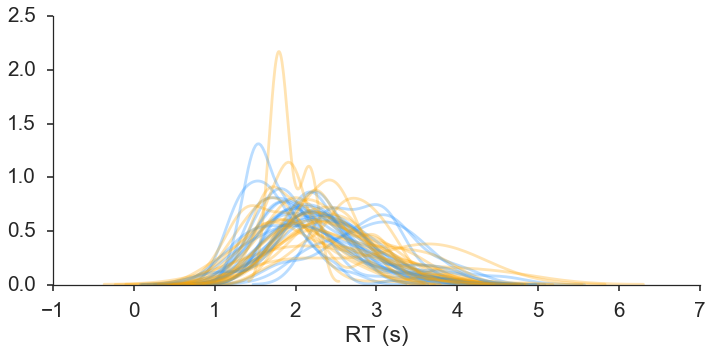

In [47]:
data = dt
condition = 'sourcehit'

r = len(subj_info.subid)
fig, ax = plt.subplots(1,1, figsize=(10,5))

group_data = pd.DataFrame()
for group, sub in zip(subj_info.group, subj_info.subid):
    
    data = dt
    data = data[(data.mem_conditions == condition) &
                (data.subid == sub)]
    
    if group == 'control-fmri':
        color = 'dodgerblue'
    else: 
        color = 'orange'
    
    sd = np.std(data.respRT)
    group_data = group_data.append({'subid': sub,
                       'group': group,
                       'sd': sd}, ignore_index=True)
        
    sns.kdeplot(data.respRT, color=color, legend=False, alpha=.3)
sns.despine()
plt.xlabel('RT (s)')
plt.tight_layout()
    
# plt.savefig('/Users/sgagnon/Desktop/rt_dist.png')

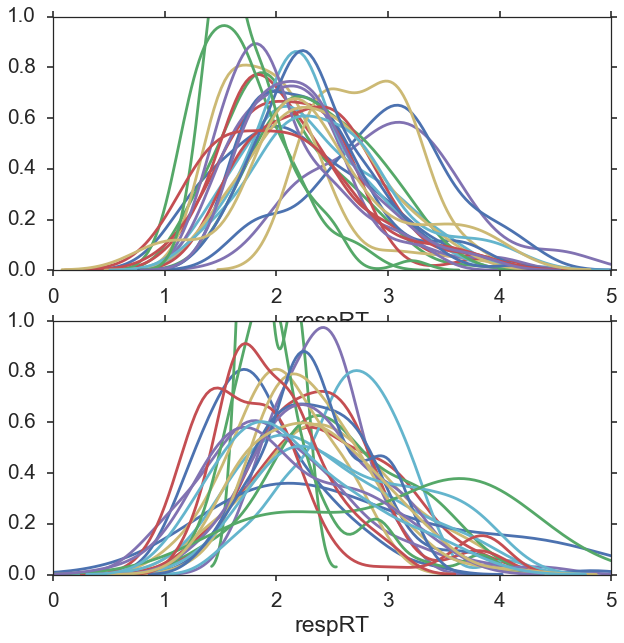

In [48]:
data = dt
condition = 'sourcehit'

r = len(subj_info.subid)
fig, ax = plt.subplots(2,1, figsize=(10,10))

group_data = pd.DataFrame()
for group, sub in zip(subj_info.group, subj_info.subid):
    
    data = dt
    data = data[(data.mem_conditions == condition) &
                (data.subid == sub)]
    
    group_data = group_data.append({'subid': sub,
                       'group': group,
                       'sd': np.std(data.respRT)}, ignore_index=True)
    
    if group == 'control-fmri':
        axis = 0
    else: 
        axis = 1
        
    sns.distplot(data.respRT, ax=ax[axis], hist=False)
    ax[axis].set_xlim(0,5)
    ax[axis].set_ylim(0,1)

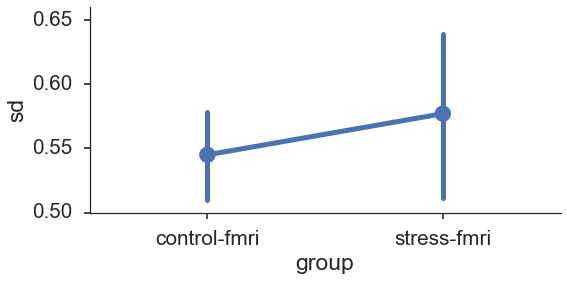

In [49]:
sns.factorplot(x='group', y='sd', data=group_data, aspect=2)

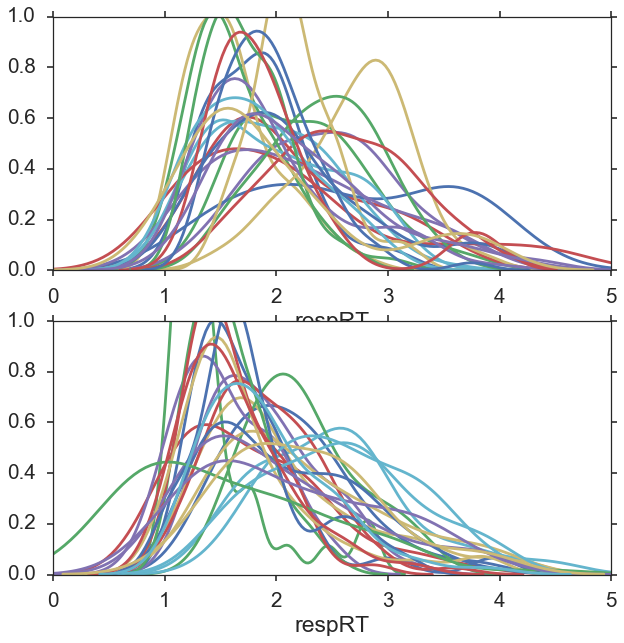

In [50]:
data = dt
condition = 'CR'

r = len(subj_info.subid)
fig, ax = plt.subplots(2,1, figsize=(10,10))

for group, sub in zip(subj_info.group, subj_info.subid):
    
    data = dt
    data = data[(data.mem_conditions == condition) &
                (data.subid == sub)]
    
    if group == 'control-fmri':
        axis = 0
    else: 
        axis = 1
        
    sns.distplot(data.respRT, ax=ax[axis], hist=False)
    ax[axis].set_xlim(0,5)
    ax[axis].set_ylim(0,1)

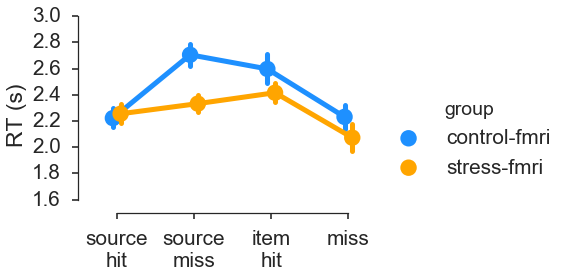

In [51]:
data = dt.groupby(['subid', 'mem_conditions', 'group']).median().reset_index()
data = data[data.mem_conditions.isin(['M', 'itemhit_lo', 'sourcehit', 'sourcemiss_hi'])]

p = sns.factorplot(x='mem_conditions', y='respRT', aspect=1.5, dodge=0.1,
               hue='group', palette=exp['palette'], order = ['sourcehit', 'sourcemiss_hi', 'itemhit_lo', 'M'],
               units='subid', ci=68, data=data)
plt.ylim(1.5, 3)
p.set_xticklabels(['source\nhit', 'source\nmiss', 'item\nhit', 'miss'])
# plt.xticks(rotation=45)
# plt.tight_layout()
sns.despine(trim=True)
p.set_xlabels('')
p.set_ylabels('RT (s)')

plt.savefig(op.join('/Users/sgagnon/Dropbox/Stanford/Presentations/AP/behav_rt_old.png'), dpi=600)

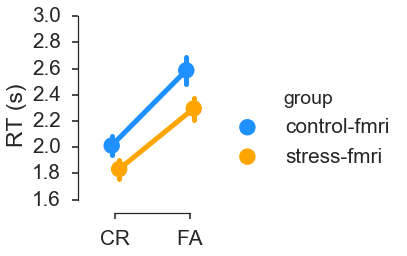

In [52]:
data = dt.groupby(['subid', 'mem_conditions', 'group']).median().reset_index()
data = data[data.mem_conditions.isin(['CR', 'FA'])]

p = sns.factorplot(x='mem_conditions', y='respRT', aspect=1, dodge=0.1,
               hue='group', palette=exp['palette'], 
               units='subid', ci=68, data=data)
plt.ylim(1.5, 3)
sns.despine(trim=True)
p.set_xlabels('')
p.set_ylabels('RT (s)')

plt.savefig('/Users/sgagnon/Dropbox/Stanford/Presentations/AP/behav_rt_new.png', dpi=600)

/Users/sgagnon/anaconda/lib/python2.7/site-packages/seaborn-0.8.dev0-py2.7.egg/seaborn/categorical.py:3430: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


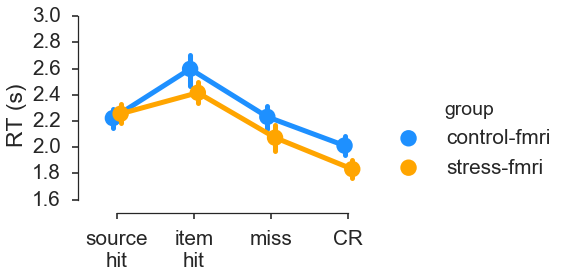

In [53]:
data = dt.groupby(['subid', 'mem_conditions', 'group']).median().reset_index()
conditions = ['sourcehit', 'itemhit_lo', 'M', 'CR']
data = data[data.mem_conditions.isin(conditions)]

p = sns.factorplot(x='mem_conditions', y='respRT', aspect=1.5, dodge=0.1,
               hue='group', palette=exp['palette'], x_order = conditions,
               units='subid', ci=68, data=data)
plt.ylim(1.5, 3)
p.set_xticklabels(['source\nhit', 'item\nhit', 'miss', 'CR'])
# plt.xticks(rotation=45)
# plt.tight_layout()
sns.despine(trim=True)
p.set_xlabels('')
p.set_ylabels('RT (s)')

plt.savefig(op.join('/Users/sgagnon/Dropbox/Stanford/Presentations/AP/behav_rt_forSPL.png'), dpi=600)

### Number trials total (to figure out low trial counts)

In [54]:
data = dt.groupby(['subid', 'mem_conditions', 'group']).count().reset_index()
piv_trials = data.pivot_table(values='trial',index=['group', 'subid'] , columns='mem_conditions',).fillna(0)
data = pd.DataFrame(piv_trials).reset_index()
data = pd.melt(data, id_vars=['subid', 'group'], value_vars=list(dt.mem_conditions.unique()))
data.query('value < 6 & mem_conditions != "nuisance"')

,subid,group,mem_conditions,value
10,ap110,control-fmri,sourcemiss_hi,1.0
22,ap158,control-fmri,sourcemiss_hi,3.0
24,ap151,stress-fmri,sourcemiss_hi,2.0
118,ap151,stress-fmri,sourcehit,3.0
123,ap156,stress-fmri,sourcehit,5.0
145,ap104,control-fmri,M,5.0
154,ap114,control-fmri,M,4.0
161,ap121,control-fmri,M,5.0
169,ap155,stress-fmri,M,5.0
177,ap164,stress-fmri,M,5.0


### Minimum number of given trial types within a run

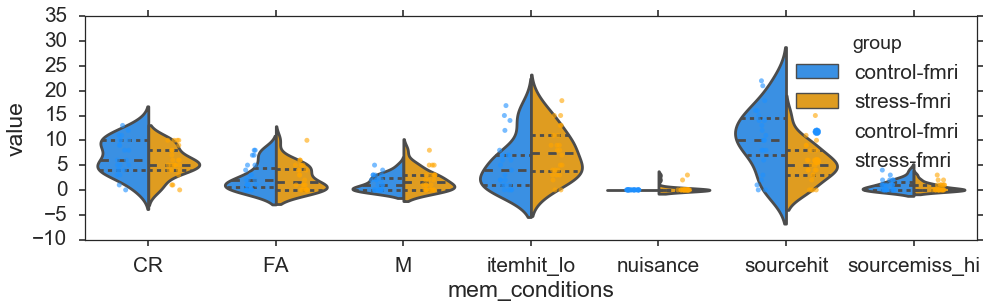

In [55]:
data = dt.groupby(['subid', 'mem_conditions', 'group', 'run']).count().reset_index()

# do this to get the actual number per run, include zeros where no trials exist
piv_trials = data.pivot_table(values='trial',index=['group', 'subid', 'run'] , columns='mem_conditions',).fillna(0)
data = pd.DataFrame(piv_trials).reset_index()
data = pd.melt(data, id_vars=['subid', 'group', 'run'], value_vars=list(dt.mem_conditions.unique()))
data_mins = data.groupby(['subid', 'mem_conditions', 'group']).min().reset_index()

f, ax = plt.subplots(figsize=(16,4))

sns.violinplot(x='mem_conditions', y='value', hue='group', palette=exp['palette'], 
               inner='quartile', scale='width', split=True, data=data_mins)

sns.stripplot(x='mem_conditions', y='value', hue='group', palette=exp['palette'], 
              data=data_mins, split=True, jitter=True, alpha=.6)

When removing 151 and 156, all subjects have sourcehits in at least 3 runs

In [56]:
data.query('mem_conditions == "sourcehit" & value < 1')

,subid,group,run,mem_conditions,value
627,ap110,control-fmri,6,sourcehit,0.0
699,ap158,control-fmri,6,sourcehit,0.0
707,ap151,stress-fmri,2,sourcehit,0.0
708,ap151,stress-fmri,3,sourcehit,0.0
710,ap151,stress-fmri,5,sourcehit,0.0
711,ap151,stress-fmri,6,sourcehit,0.0
736,ap156,stress-fmri,2,sourcehit,0.0
738,ap156,stress-fmri,4,sourcehit,0.0
740,ap156,stress-fmri,6,sourcehit,0.0
827,ap172,stress-fmri,3,sourcehit,0.0


When removing subjs 104, 116, 160, and 169, all subjects have item hits in at least 5 runs

In [57]:
data.query('mem_conditions == "itemhit_lo" & value < 1')

,subid,group,run,mem_conditions,value
1424,ap103,control-fmri,2,itemhit_lo,0.0
1429,ap104,control-fmri,1,itemhit_lo,0.0
1430,ap104,control-fmri,2,itemhit_lo,0.0
1431,ap104,control-fmri,3,itemhit_lo,0.0
1432,ap104,control-fmri,4,itemhit_lo,0.0
1433,ap104,control-fmri,5,itemhit_lo,0.0
1434,ap104,control-fmri,6,itemhit_lo,0.0
1495,ap116,control-fmri,1,itemhit_lo,0.0
1496,ap116,control-fmri,2,itemhit_lo,0.0
1498,ap116,control-fmri,4,itemhit_lo,0.0


All subjects have CRs in at least 3 runs

In [58]:
data.query('mem_conditions == "CR" & value < 1')

,subid,group,run,mem_conditions,value
404,ap121,control-fmri,4,CR,0.0
405,ap121,control-fmri,5,CR,0.0
406,ap121,control-fmri,6,CR,0.0
500,ap164,stress-fmri,5,CR,0.0


# Figure out contrasts (item hit analysis (separating item hits from HC source misses)) that are affected by low trial counts, and replace model copes

In [175]:
import lyman
import lyman.workflows as wf
from lyman import tools
import shutil

exp_dir = 'ap_memory_raw' #ap_memory-itemhits (prev version of main analysis)
project = lyman.gather_project_info()
exp_info = lyman.gather_experiment_info(exp_dir)
# exp_info = lyman.gather_experiment_info('ap_memory', 'itemhits')
subject_file = op.join(os.environ["LYMAN_DIR"], "subjects_rerun.txt")
subject_list = np.loadtxt(subject_file, str).tolist()

# Define some parameters
smoothing_list = ['smoothed','unsmoothed']
base_dir = '/Volumes/group/awagner/sgagnon/AP/analysis/' + exp_dir
copefile = op.join(base_dir, '{subid}/model/{smoothing}/run_{run_num}/cope{contrast_id}.nii.gz')
varcopefile = op.join(base_dir, '{subid}/model/{smoothing}/run_{run_num}/varcope{contrast_id}.nii.gz')

##########################################################
# Create data structure of trial counts per run (zero if none), where "dt" is a pandas dataframe of trial-wise data for each subject
# "dt" must include a column for subid, trial number, condition label (mem_conditions), "group" if relevant, and run number
data = dt.groupby(['subid', 'mem_conditions', 'group', 'run']).count().reset_index()
piv_trials = data.pivot_table(values='trial',index=['group', 'subid', 'run'], columns='mem_conditions',).fillna(0)
data = pd.DataFrame(piv_trials).reset_index()
data = pd.melt(data, id_vars=['subid', 'group', 'run'], value_vars=list(dt.mem_conditions.unique()))

# note that the following assumes that the conditions are defined as the first contrasts; 
# the first contrast number will be used to grab the empty cope and varcope files and copy 
# over into the other contrasts that contain the target condition

for target_condition in exp_info['condition_names']:
    if target_condition != 'nuisance': # ignore these for now / not in higher order contrasts
        
        # Get list of of contrast numbers containing the target condition
        contrast_num = 1 # counter to figure out which contrast we're at (not elegant, sorry...)
        contrast_list = []
        for contrast in exp_info['contrasts']:

            if target_condition in contrast[1]:
                contrast_list.append(contrast_num)

            contrast_num = contrast_num + 1
        print target_condition, contrast_list
        
        # For each subject that has a run *not* containing the target condition, replace the 
        # 1st level copes and varcopes for each contrast containing the target condition with 
        # the empty niftis
#         for subid in subj_info.subid:
#         for subid in ['ap158', 'ap171', 'ap173', 'ap172', 'ap164', 'ap168']:
#         for subid in subject_list:
        for subid in ['ap160']:
            
            # Determine null runs for the target condition
            null_runs = list(data[(data.subid == subid) & 
                                  (data.mem_conditions == target_condition) & 
                                  (data.value == 0)].run)
            print subid, null_runs
            
            # Iterate through the null runs for each type of smoothing
            for run_num in null_runs:
                for smoothing in smoothing_list:
                    
                    # Set up target files for this run
                    target_copefile = copefile.format(subid=subid, smoothing=smoothing, run_num=run_num, contrast_id=contrast_list[0])
                    target_varcopefile = varcopefile.format(subid=subid, smoothing=smoothing, run_num=run_num, contrast_id=contrast_list[0])
                    
                    print 'target_file = ' + target_copefile
                    
                    # Iterate through each relevant contrast
                    for contrast_replace in contrast_list[1:]:
                        replace_copefile = copefile.format(subid=subid, smoothing=smoothing, run_num=run_num, contrast_id=contrast_replace)
                        replace_varcopefile = varcopefile.format(subid=subid, smoothing=smoothing, run_num=run_num, contrast_id=contrast_replace)
                        
                        # Copy the target cope file for each contrast that includes it
                        shutil.copyfile(target_copefile, replace_copefile)
                        shutil.copyfile(target_varcopefile, replace_varcopefile)

CR [1, 12, 13, 14, 15, 16]
ap160 []
FA [2, 19, 22, 23, 24]
ap160 [6]
target_file = /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/ap160/model/smoothed/run_6/cope2.nii.gz
target_file = /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/ap160/model/unsmoothed/run_6/cope2.nii.gz
sourcehit [3, 8, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24]
ap160 []
itemhit_lo [4, 8, 9, 10, 12, 13, 15, 17, 18, 22, 23, 24]
ap160 [1, 2, 3, 4, 5]
target_file = /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/ap160/model/smoothed/run_1/cope4.nii.gz
target_file = /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/ap160/model/unsmoothed/run_1/cope4.nii.gz
target_file = /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/ap160/model/smoothed/run_2/cope4.nii.gz
target_file = /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/ap160/model/unsmoothed/run_2/cope4.nii.gz
target_file = /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw/ap160/model/smoothed/run_3/cope4

### For temp deriv analysis (4 subjs)

In [23]:
import lyman
import lyman.workflows as wf
from lyman import tools
import shutil

exp_dir = 'ap_memory_raw-tempderiv'
project = lyman.gather_project_info()
exp_info = lyman.gather_experiment_info(exp_dir)
subject_file = op.join(os.environ["LYMAN_DIR"], "example_subjects.txt")
subject_list = np.loadtxt(subject_file, str).tolist()

# Define some parameters
smoothing_list = ['smoothed']
base_dir = '/Volumes/group/awagner/sgagnon/AP/analysis/' + exp_dir
copefile = op.join(base_dir, '{subid}/model/{smoothing}/run_{run_num}/cope{contrast_id}.nii.gz')
varcopefile = op.join(base_dir, '{subid}/model/{smoothing}/run_{run_num}/varcope{contrast_id}.nii.gz')

##########################################################
# Create data structure of trial counts per run (zero if none), where "dt" is a pandas dataframe of trial-wise data for each subject
# "dt" must include a column for subid, trial number, condition label (mem_conditions), "group" if relevant, and run number
data = dt.groupby(['subid', 'mem_conditions', 'group', 'run']).count().reset_index()
piv_trials = data.pivot_table(values='trial',index=['group', 'subid', 'run'], columns='mem_conditions',).fillna(0)
data = pd.DataFrame(piv_trials).reset_index()
data = pd.melt(data, id_vars=['subid', 'group', 'run'], value_vars=list(dt.mem_conditions.unique()))

# note that the following assumes that the conditions are defined as the first contrasts; 
# the first contrast number will be used to grab the empty cope and varcope files and copy 
# over into the other contrasts that contain the target condition

for target_condition in exp_info['condition_names']:
    if target_condition != 'nuisance': # ignore these for now / not in higher order contrasts
        
        # Get list of of contrast numbers containing the target condition
        contrast_num = 1 # counter to figure out which contrast we're at (not elegant, sorry...)
        contrast_list = []
        for contrast in exp_info['contrasts']:

            if target_condition in contrast[1]:
                contrast_list.append(contrast_num)

            contrast_num = contrast_num + 1
        print target_condition, contrast_list
        
        # For each subject that has a run *not* containing the target condition, replace the 
        # 1st level copes and varcopes for each contrast containing the target condition with 
        # the empty niftis
        for subid in subject_list:
#         for subid in ['ap160']:
            
            # Determine null runs for the target condition
            null_runs = list(data[(data.subid == subid) & 
                                  (data.mem_conditions == target_condition) & 
                                  (data.value == 0)].run)
            print subid, null_runs
            
            # Iterate through the null runs for each type of smoothing
            for run_num in null_runs:
                for smoothing in smoothing_list:
                    
                    # Set up target files for this run
                    target_copefile = copefile.format(subid=subid, smoothing=smoothing, run_num=run_num, contrast_id=contrast_list[0])
                    target_varcopefile = varcopefile.format(subid=subid, smoothing=smoothing, run_num=run_num, contrast_id=contrast_list[0])
                    
                    print 'target_file = ' + target_copefile
                    
                    # Iterate through each relevant contrast
                    for contrast_replace in contrast_list[1:]:
                        replace_copefile = copefile.format(subid=subid, smoothing=smoothing, run_num=run_num, contrast_id=contrast_replace)
                        replace_varcopefile = varcopefile.format(subid=subid, smoothing=smoothing, run_num=run_num, contrast_id=contrast_replace)
                        
                        # Copy the target cope file for each contrast that includes it
                        shutil.copyfile(target_copefile, replace_copefile)
                        shutil.copyfile(target_varcopefile, replace_varcopefile)

CR [1, 12, 13, 14, 15, 16]
ap103 []
ap116 []
ap162 []
ap169 []
FA [2, 19, 22, 23, 24]
ap103 [1, 2]
target_file = /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-tempderiv/ap103/model/smoothed/run_1/cope2.nii.gz
target_file = /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-tempderiv/ap103/model/smoothed/run_2/cope2.nii.gz
ap116 [1, 5]
target_file = /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-tempderiv/ap116/model/smoothed/run_1/cope2.nii.gz
target_file = /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-tempderiv/ap116/model/smoothed/run_5/cope2.nii.gz
ap162 []
ap169 [2, 3, 6]
target_file = /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-tempderiv/ap169/model/smoothed/run_2/cope2.nii.gz
target_file = /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-tempderiv/ap169/model/smoothed/run_3/cope2.nii.gz
target_file = /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-tempderiv/ap169/model/smoothed/run_6/cope2.nii.gz
sourcehit [3, 8,

In [176]:
# note, since splitting by shock cond, this will endup replacing already null contrasts w/zeros, since half contrasts are only in half the runs
dt['memCond_shockCond'] = dt.mem_conditions + '_' + dt.shockCond

import lyman
import lyman.workflows as wf
from lyman import tools
import shutil

exp_dir = 'ap_memory_raw-byshockCond' #ap_memory-itemhits
project = lyman.gather_project_info()
exp_info = lyman.gather_experiment_info(exp_dir)
# exp_info = lyman.gather_experiment_info('ap_memory', 'itemhits')
subject_file = op.join(os.environ["LYMAN_DIR"], "subjects_byshockCondSH.txt")
subject_list = np.loadtxt(subject_file, str).tolist()

# Define some parameters
smoothing_list = ['smoothed','unsmoothed']
base_dir = '/Volumes/group/awagner/sgagnon/AP/analysis/' + exp_dir
copefile = op.join(base_dir, '{subid}/model/{smoothing}/run_{run_num}/cope{contrast_id}.nii.gz')
varcopefile = op.join(base_dir, '{subid}/model/{smoothing}/run_{run_num}/varcope{contrast_id}.nii.gz')

##########################################################
# Create data structure of trial counts per run (zero if none), where "dt" is a pandas dataframe of trial-wise data for each subject
# "dt" must include a column for subid, trial number, condition label (mem_conditions), "group" if relevant, and run number
data = dt.groupby(['subid', 'memCond_shockCond', 'group', 'run']).count().reset_index()
piv_trials = data.pivot_table(values='trial',index=['group', 'subid', 'run'], columns='memCond_shockCond',).fillna(0)
data = pd.DataFrame(piv_trials).reset_index()
data = pd.melt(data, id_vars=['subid', 'group', 'run'], value_vars=list(dt.memCond_shockCond.unique()))

# note that the following assumes that the conditions are defined as the first contrasts; 
# the first contrast number will be used to grab the empty cope and varcope files and copy 
# over into the other contrasts that contain the target condition

for target_condition in exp_info['condition_names']:
    if target_condition != 'nuisance': # ignore these for now / not in higher order contrasts
        
        # Get list of of contrast numbers containing the target condition
        contrast_num = 1 # counter to figure out which contrast we're at (not elegant, sorry...)
        contrast_list = []
        for contrast in exp_info['contrasts']:

            if target_condition in contrast[1]:
                contrast_list.append(contrast_num)

            contrast_num = contrast_num + 1
        print target_condition, contrast_list
        
        # For each subject that has a run *not* containing the target condition, replace the 
        # 1st level copes and varcopes for each contrast containing the target condition with 
        # the empty niftis
#         for subid in subject_list:
        for subid in ['ap160']:
            
            # Determine null runs for the target condition
            null_runs = list(data[(data.subid == subid) & 
                                  (data.memCond_shockCond == target_condition) & 
                                  (data.value == 0)].run)
            print subid, null_runs
            
            # Iterate through the null runs for each type of smoothing
            for run_num in null_runs:
                for smoothing in smoothing_list:
                    
                    # Set up target files for this run
                    target_copefile = copefile.format(subid=subid, smoothing=smoothing, run_num=run_num, contrast_id=contrast_list[0])
                    target_varcopefile = varcopefile.format(subid=subid, smoothing=smoothing, run_num=run_num, contrast_id=contrast_list[0])
                    
                    print 'target_file = ' + target_copefile
                    
                    # Iterate through each relevant contrast
                    for contrast_replace in contrast_list[1:]:
                        replace_copefile = copefile.format(subid=subid, smoothing=smoothing, run_num=run_num, contrast_id=contrast_replace)
                        replace_varcopefile = varcopefile.format(subid=subid, smoothing=smoothing, run_num=run_num, contrast_id=contrast_replace)
                        
                        # Copy the target cope file for each contrast that includes it
                        shutil.copyfile(target_copefile, replace_copefile)
                        shutil.copyfile(target_varcopefile, replace_varcopefile)

CR_safe [1, 14, 15, 18, 19]
ap160 [1, 3, 5]
target_file = /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-byshockCond/ap160/model/smoothed/run_1/cope1.nii.gz
target_file = /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-byshockCond/ap160/model/unsmoothed/run_1/cope1.nii.gz
target_file = /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-byshockCond/ap160/model/smoothed/run_3/cope1.nii.gz
target_file = /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-byshockCond/ap160/model/unsmoothed/run_3/cope1.nii.gz
target_file = /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-byshockCond/ap160/model/smoothed/run_5/cope1.nii.gz
target_file = /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-byshockCond/ap160/model/unsmoothed/run_5/cope1.nii.gz
FA_safe [2]
ap160 [1, 3, 5, 6]
target_file = /Volumes/group/awagner/sgagnon/AP/analysis/ap_memory_raw-byshockCond/ap160/model/smoothed/run_1/cope2.nii.gz
target_file = /Volumes/group/awagner/sgagnon/AP/analysis/a

## Compute proportions for trials

In [59]:
# Objective conditions
dt['obj_conditions'] = dt.cond

dt.loc[dt.obj_conditions.isin(['outdoor', 'indoor']), 'obj_conditions'] = 'old'
dt.loc[dt.obj_conditions.isin(['foil']), 'obj_conditions'] = 'new'
dt.loc[dt.shock_and_post > 0, 'obj_conditions'] = 'nuisance'


In [60]:
data_obj = dt.groupby(['subid', 'obj_conditions', 'group']).count().reset_index()
data_obj = data_obj.loc[:,['subid', 'group', 'obj_conditions', 'trial']]
data_obj.head()

,subid,group,obj_conditions,trial
0,ap100,control-fmri,new,79
1,ap100,control-fmri,old,160
2,ap101,control-fmri,new,84
3,ap101,control-fmri,old,168
4,ap102,control-fmri,new,84


In [61]:
data = dt.groupby(['subid', 'mem_conditions', 'group']).count().reset_index()
data = data.groupby(['subid', 'mem_conditions', 'group']).mean().reset_index()
data_subj = data.loc[:,['subid', 'group', 'mem_conditions', 'trial']]
data_subj = data_subj.query('mem_conditions != "nuisance"')
data_subj.head()

,subid,group,mem_conditions,trial
0,ap100,control-fmri,CR,63
1,ap100,control-fmri,FA,16
2,ap100,control-fmri,M,32
3,ap100,control-fmri,itemhit_lo,25
5,ap100,control-fmri,sourcehit,89


In [62]:
data = dt.groupby(['subid', 'mem_conditions', 'group']).count().reset_index()
data = data.groupby(['subid', 'mem_conditions', 'group']).mean().reset_index()
data_subj = data.loc[:,['subid', 'group', 'mem_conditions', 'trial']]
data_subj = data_subj.query('mem_conditions != "nuisance"')
data_subj.head()

,subid,group,mem_conditions,trial
0,ap100,control-fmri,CR,63
1,ap100,control-fmri,FA,16
2,ap100,control-fmri,M,32
3,ap100,control-fmri,itemhit_lo,25
5,ap100,control-fmri,sourcehit,89


In [63]:
data_subj['proportion'] = 0

for subid in data_subj.subid.unique():
    for mem_condition in data_subj.mem_conditions.unique():
        if mem_condition in ['CR', 'FA']:
            resp = data_subj[(data_subj.subid == subid) & 
                             (data_subj.mem_conditions == mem_condition)].trial.values[0]
            total = data_obj[(data_obj.subid == subid) & 
                             (data_obj.obj_conditions == 'new')].trial.values[0]
            data_subj.loc[(data_subj.mem_conditions == mem_condition)&
                         (data_subj.subid == subid),'proportion'] = resp.astype(float)/total
        else:
            if len(data_subj[(data_subj.subid == subid) & 
                             (data_subj.mem_conditions == mem_condition)].trial) > 0:
                resp = data_subj[(data_subj.subid == subid) & 
                                 (data_subj.mem_conditions == mem_condition)].trial.values[0]
                total = data_obj[(data_obj.subid == subid) & 
                                 (data_obj.obj_conditions == 'old')].trial.values[0]
                data_subj.loc[(data_subj.mem_conditions == mem_condition)&
                             (data_subj.subid == subid),'proportion'] = resp.astype(float)/total

In [64]:
data_tmp = data_subj.pivot_table(values='proportion', index=['subid', 'group'], 
                                  columns='mem_conditions', fill_value=0).reset_index()
data_subj = pd.melt(data_tmp, id_vars=['subid', 'group'], 
                    value_vars=list(data_subj.mem_conditions.unique()), value_name='proportion')
data_subj.head()

,subid,group,mem_conditions,proportion
0,ap100,control-fmri,CR,0.797468
1,ap101,control-fmri,CR,0.976190
2,ap102,control-fmri,CR,0.273810
3,ap103,control-fmri,CR,0.880952
4,ap104,control-fmri,CR,0.964286


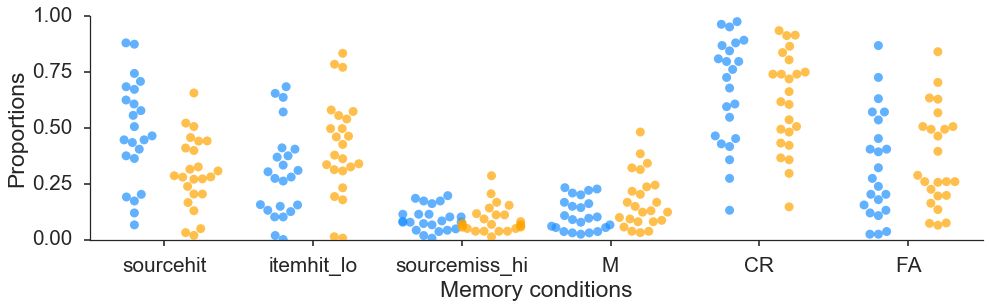

In [65]:
f, ax = plt.subplots(figsize=(16,4))
order = ['sourcehit', 'itemhit_lo', 'sourcemiss_hi', 'M', 'CR', 'FA']

# sns.violinplot(x='mem_conditions', y='proportion', hue='group', palette=exp['palette'], cut=0, 
#                inner='quartile', scale='width', split=True, data=data_subj, order=order)

sns.swarmplot(x='mem_conditions', y='proportion', hue='group', palette=exp['palette'], alpha=0.7,
              data=data_subj, split=True, order=order, size=9)
sns.despine()
ax.set(ylabel='Proportions',
       yticks=[0, 0.25, 0.5, 0.75, 1],
       ylim=(0, 1), 
       xlabel='Memory conditions')
ax.legend([])

In [66]:
data_subj.head()

,subid,group,mem_conditions,proportion
0,ap100,control-fmri,CR,0.797468
1,ap101,control-fmri,CR,0.976190
2,ap102,control-fmri,CR,0.273810
3,ap103,control-fmri,CR,0.880952
4,ap104,control-fmri,CR,0.964286


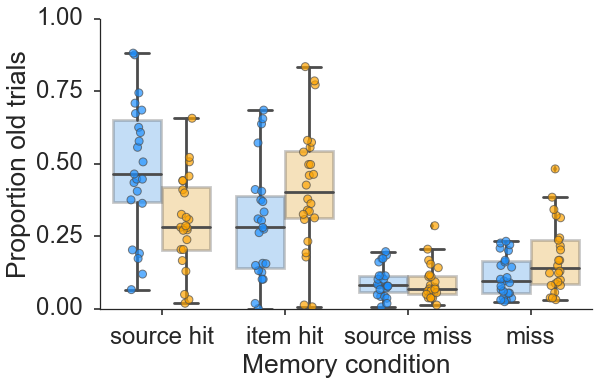

In [67]:
data = data_subj[data_subj.mem_conditions.isin(['sourcehit', 'itemhit_lo', 'sourcemiss_hi', 'M'])]

sns.set_context('poster', font_scale=1.5)
f, ax = plt.subplots(figsize=(9,6))

data.loc[data.mem_conditions == 'sourcehit', 'mem_conditions'] = 'source hit'
data.loc[data.mem_conditions == 'itemhit_lo', 'mem_conditions'] = 'item hit'
data.loc[data.mem_conditions == 'sourcemiss_hi', 'mem_conditions'] = 'source miss'
data.loc[data.mem_conditions == 'M', 'mem_conditions'] = 'miss'

order = ['source hit', 'item hit', 'source miss', 'miss']#, 'CR', 'FA']

ax = sns.boxplot(x='mem_conditions', y='proportion', hue='group', palette=exp['palette'], 
               data=data, order=order)
plt.setp(ax.artists, alpha=.3)

sns.stripplot(x='mem_conditions', y='proportion', hue='group', palette=exp['palette'], alpha=0.7, split=True,
              data=data, jitter=True, order=order, linewidth=1, size=8)
sns.despine()
ax.set(ylabel='Proportion old trials',
       yticks=[0, 0.25, 0.5, 0.75, 1],
       ylim=(0, 1), 
       xlabel='Memory condition')
ax.legend([])
plt.tight_layout()
plt.savefig('/Users/sgagnon/Dropbox/Stanford/Presentations/AP/behav_proportions_old.png', dpi=600)

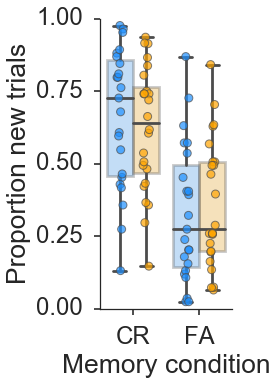

In [68]:
data = data_subj[data_subj.mem_conditions.isin(['CR', 'FA'])]
sns.set_context('poster', font_scale=1.5)
f, ax = plt.subplots(figsize=(4,6))

order = ['CR', 'FA']

sns.boxplot(x='mem_conditions', y='proportion', hue='group', palette=exp['palette'], 
               data=data, order=order)
plt.setp(ax.artists, alpha=.3)

sns.stripplot(x='mem_conditions', y='proportion', hue='group', palette=exp['palette'], alpha=0.7,
              data=data, jitter=True, order=order, split=True, linewidth=1, size=8)
ax.set(ylabel='Proportion new trials',
       yticks=[0, 0.25, 0.5, 0.75, 1],
       ylim=(0, 1), 
       xlabel='Memory condition')
ax.legend([])
sns.despine()
plt.tight_layout()
plt.savefig('/Users/sgagnon/Dropbox/Stanford/Presentations/AP/behav_proportions_new.png', dpi=600)

In [69]:
data_subj.loc[data_subj.subid == 'ap174']

,subid,group,mem_conditions,proportion
46,ap174,stress-fmri,CR,0.740741
93,ap174,stress-fmri,FA,0.259259
140,ap174,stress-fmri,M,0.079755
187,ap174,stress-fmri,itemhit_lo,0.325153
234,ap174,stress-fmri,sourcehit,0.521472
281,ap174,stress-fmri,sourcemiss_hi,0.067485


### Do some recoding of labels

In [70]:
dt['onset_code'] = dt.accSpec

dt.loc[dt.onset_code.isin(['FAI_Hi', 'FAO_Hi', 'FAI_Lo', 'FAO_Lo']), 'onset_code'] = 'FA'
dt.loc[dt.onset_code.isin(['MI']), 'onset_code'] = 'M'
dt.loc[dt.onset_code.isin(['CR']), 'onset_code'] = 'CR' #redundant, but just to remember

dt.loc[dt.onset_code.isin(['HO_Hi', 'HI_Hi']), 'onset_code'] = 'sourcehit'
dt.loc[dt.onset_code.isin(['HO_Lo', 'HI_Lo', 'SMO_Hi', 'SMI_Hi', 'SMO_Lo', 'SMI_Lo']), 'onset_code'] = 'itemhit'

dt.loc[dt.onset_code.isin(['no response']), 'onset_code'] = 'nuisance'
dt.loc[dt.shock_and_post > 0, 'onset_code'] = 'nuisance' # replaces 1 and 2 with nuisance (shock and post)

In [71]:
dt.onset_code.unique()

array(['itemhit', 'CR', 'sourcehit', 'M', 'FA', 'nuisance'], dtype=object)

### Mean number of trials/condition per run (points = subjects)

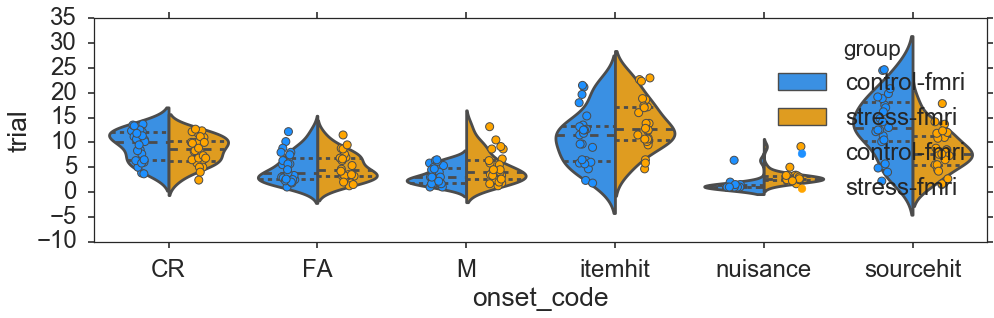

In [72]:
f, ax = plt.subplots(figsize=(16,4))

data = dt.groupby(['subid', 'onset_code', 'group', 'run']).count().reset_index()
data = data.groupby(['subid', 'onset_code', 'group']).mean().reset_index()

ax=sns.violinplot(x='onset_code', y='trial', hue='group', palette=exp['palette'], 
               inner='quartile', scale='width', split=True, data=data)

sns.stripplot(x='onset_code', y='trial', hue='group', palette=exp['palette'], size=8,
              data=data, split=True, jitter=True, linewidth=1)


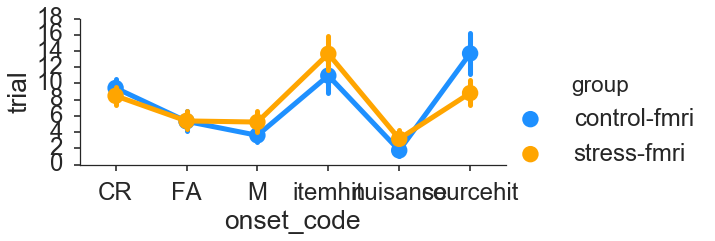

In [73]:
data = dt.groupby(['subid', 'group', 'onset_code', 'run']).count().reset_index()
sns.factorplot('onset_code', 'trial', aspect=2, hue='group',
               units='subid', ci=95, data=data, palette=exp['palette'])

### Counts broken down by rep

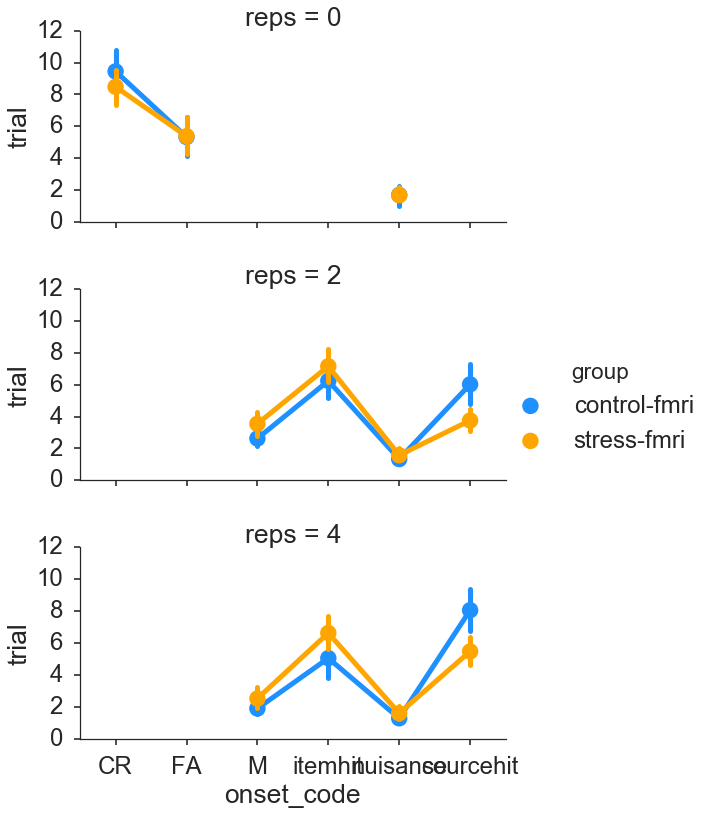

In [74]:
data = dt.groupby(['subid', 'group', 'onset_code', 'run', 'reps']).count().reset_index()
sns.factorplot('onset_code', 'trial', aspect=2, hue='group', row='reps',
               units='subid', ci=95, data=data, palette=exp['palette'])

### RTs

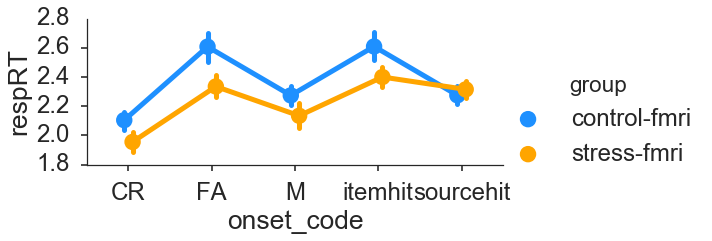

In [75]:
data = dt.groupby(['subid', 'group', 'onset_code']).mean().reset_index()
sns.factorplot('onset_code', 'respRT', aspect=2, hue='group', dodge=.1,
               units='subid', ci=68, data=data.query("onset_code != 'nuisance'"), palette=exp['palette'])

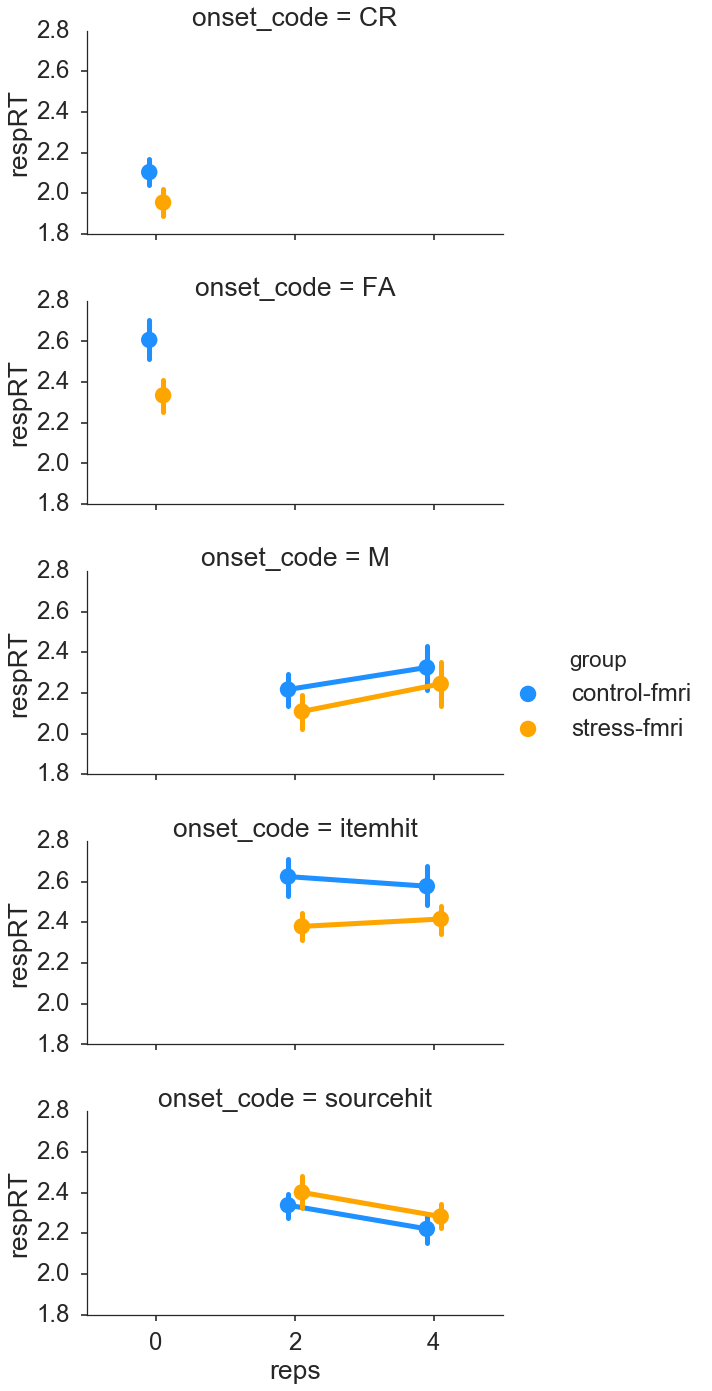

In [76]:
data = dt.groupby(['subid', 'group', 'onset_code', 'reps']).mean().reset_index()
sns.factorplot('reps', 'respRT', row='onset_code', aspect=2, hue='group', dodge=.1,
               units='subid', ci=68, data=data.query("onset_code != 'nuisance'"), palette=exp['palette'])

### Counts by subid

In [77]:
dt.groupby(['group', 'onset_code']).respRT.mean()

group         onset_code
control-fmri  CR              2.091680
              FA              2.425952
              M               2.222548
              itemhit         2.512902
              nuisance      999.000000
              sourcehit       2.228103
stress-fmri   CR              1.918754
              FA              2.281915
              M               1.991754
              itemhit         2.343129
              nuisance      483.964032
              sourcehit       2.287352
Name: respRT, dtype: float64

#### Toss subjs for MVPA

In [78]:
d_totals = dt.pivot_table(index=['subid', 'group', 'reps'], columns='mem_conditions', 
                          aggfunc='count', values='run', fill_value=0).reset_index()
d_totals = pd.melt(d_totals, id_vars=['subid', 'group', 'reps'])

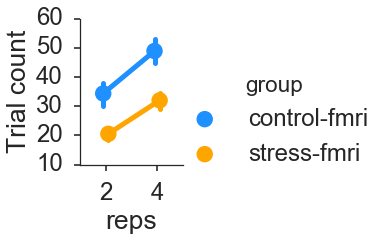

In [79]:
data = d_totals.groupby(['subid', 'group', 'mem_conditions', 'reps']).mean().reset_index()
g = sns.factorplot(x='reps', y='value', hue='group',
                   kind='point', units='subid', ci=68, dodge=.1, palette=exp['palette'],
                   data=data.loc[(data.mem_conditions == 'sourcehit') &
                                 (data.reps != '0') &
                                 (~data.subid.isin(['ap151', 'ap156', 'ap106']))])
g.set_ylabels('Trial count')
plt.locator_params(nbins=5)

plt.savefig('/Users/sgagnon/Dropbox/Stanford/Presentations/AP/behav_sourcehit_trialcounts.png', dpi=600)

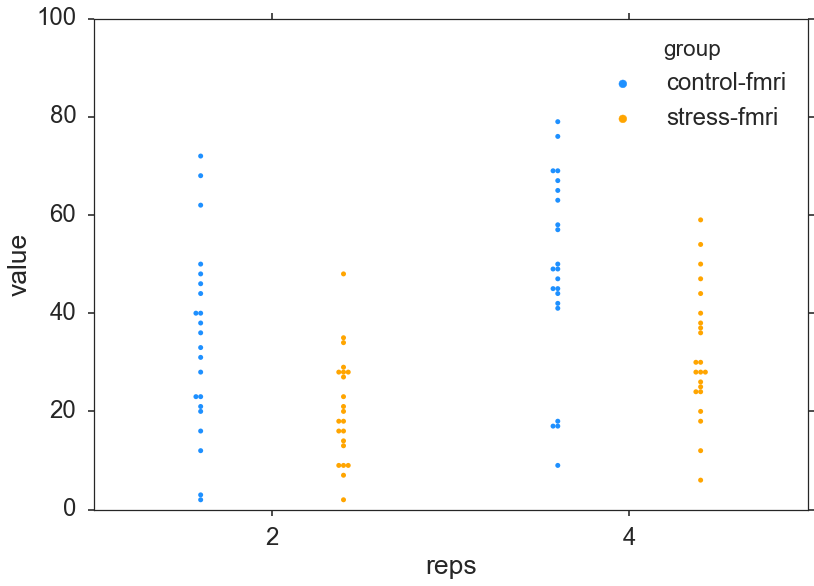

In [80]:
data = d_totals.groupby(['subid', 'group', 'mem_conditions', 'reps']).mean().reset_index()
data = data.loc[(data.mem_conditions == 'sourcehit') &
                                 (data.reps != '0') &
                                 (~data.subid.isin(['ap151', 'ap156', 'ap106']))]
g = sns.swarmplot(x='reps', y='value', hue='group',
                   palette=exp['palette'], split=True,
                   data=data)
plt.locator_params(nbins=5)
plt.ylim(0,100)
plt.savefig('/Users/sgagnon/Dropbox/Stanford/Presentations/AP/behav_sourcehit_trialcounts_swarm.png', dpi=600)

In [81]:
data[data.value < 5]

,subid,group,mem_conditions,reps,value
226,ap110,control-fmri,sourcehit,2,3
646,ap158,control-fmri,sourcehit,2,2
961,ap173,stress-fmri,sourcehit,2,2


In [82]:
d_totals = dt.pivot_table(index=['subid', 'group', 'run'], columns='mem_conditions', 
                          aggfunc='count', values='trial', fill_value=0).reset_index()
d_totals = pd.melt(d_totals, id_vars=['subid', 'group', 'run'])

In [83]:
d_totals[(d_totals.value == 1) & (d_totals.mem_conditions == 'sourcehit')]

,subid,group,run,mem_conditions,value
1455,ap108,control-fmri,3,sourcehit,1
1546,ap151,stress-fmri,4,sourcehit,1
1574,ap156,stress-fmri,3,sourcehit,1
1588,ap158,control-fmri,5,sourcehit,1
1675,ap173,stress-fmri,2,sourcehit,1


In [84]:
d_totals = dt.pivot_table(index=['subid', 'group'], columns='mem_conditions', 
                          aggfunc='count', values='run', fill_value=0).reset_index()
d_totals = pd.melt(d_totals, id_vars=['subid', 'group'])

In [85]:
d_totals[(d_totals.value <= 5) & (d_totals.mem_conditions == 'sourcehit')]

,subid,group,mem_conditions,value
258,ap151,stress-fmri,sourcehit,3
263,ap156,stress-fmri,sourcehit,5


In [86]:
d_totals[(d_totals.value <= 5) & (d_totals.mem_conditions == 'itemhit_lo')]

,subid,group,mem_conditions,value
145,ap104,control-fmri,itemhit_lo,0
156,ap116,control-fmri,itemhit_lo,3
173,ap160,stress-fmri,itemhit_lo,1
182,ap169,stress-fmri,itemhit_lo,2


In [87]:
d_totals[(d_totals.value <= 5) & (d_totals.mem_conditions == 'CR')]

,subid,group,mem_conditions,value


In [88]:
d_totals[(d_totals.value <= 5) & (d_totals.mem_conditions == 'sourcemiss_hi')]

,subid,group,mem_conditions,value
292,ap110,control-fmri,sourcemiss_hi,1
305,ap151,stress-fmri,sourcemiss_hi,2
312,ap158,control-fmri,sourcemiss_hi,3


In [89]:
d_totals[(d_totals.value <= 5) & (d_totals.mem_conditions == 'M')]

,subid,group,mem_conditions,value
98,ap104,control-fmri,M,5
107,ap114,control-fmri,M,4
114,ap121,control-fmri,M,5
121,ap155,stress-fmri,M,5
130,ap164,stress-fmri,M,5


#### Mean trials per run

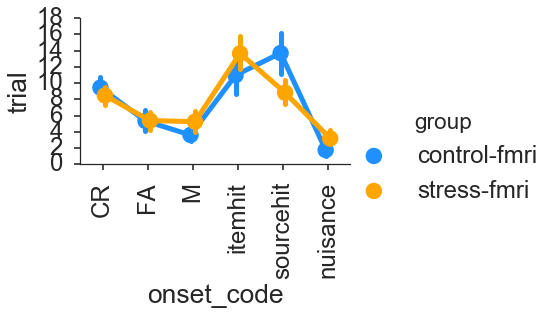

In [90]:
data = dt.groupby(['subid', 'group', 'run', 'onset_code']).count().reset_index()
g = sns.factorplot(x='onset_code', y='trial', aspect=1.5, hue='group',
                   kind='point', units='subid', ci=95, dodge=.1, palette=exp['palette'],
                   data=data)
g.set_xticklabels(rotation=90)

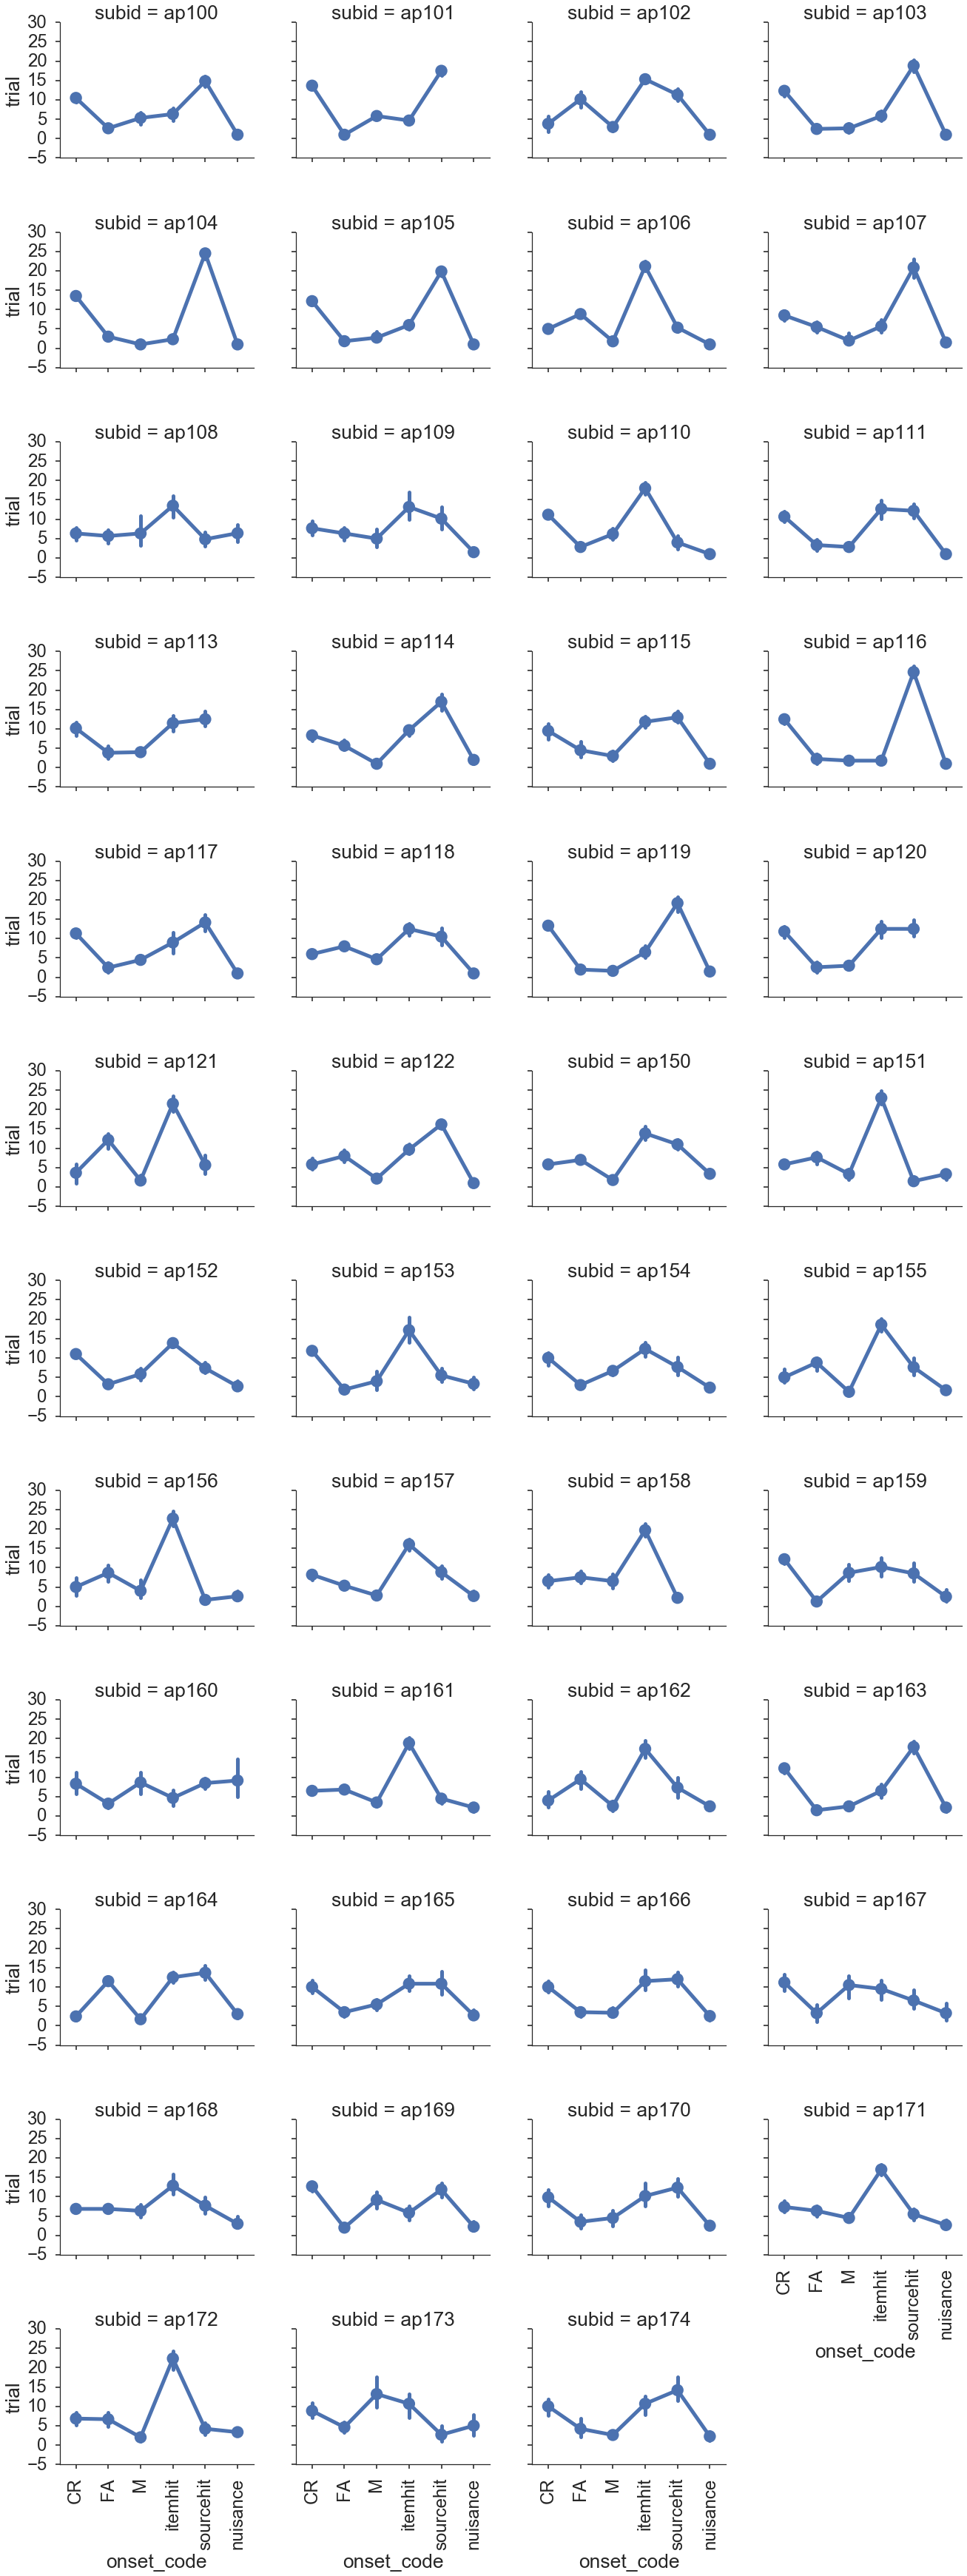

In [91]:
data = dt.groupby(['subid', 'group', 'run', 'onset_code']).count().reset_index()
g = sns.factorplot(x='onset_code', y='trial', col='subid', col_wrap=4, aspect=1.2,
               kind='point',
               data=data)
g.set_xticklabels(rotation=90)

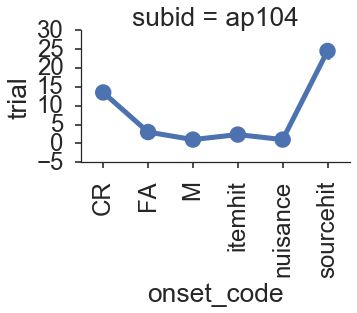

In [92]:
data = dt.groupby(['subid', 'group', 'run', 'onset_code']).count().reset_index()
g = sns.factorplot(x='onset_code', y='trial', col='subid', col_wrap=4, aspect=1.2,
               kind='point',
               data=data.query('subid == "ap104"'))
g.set_xticklabels(rotation=90)

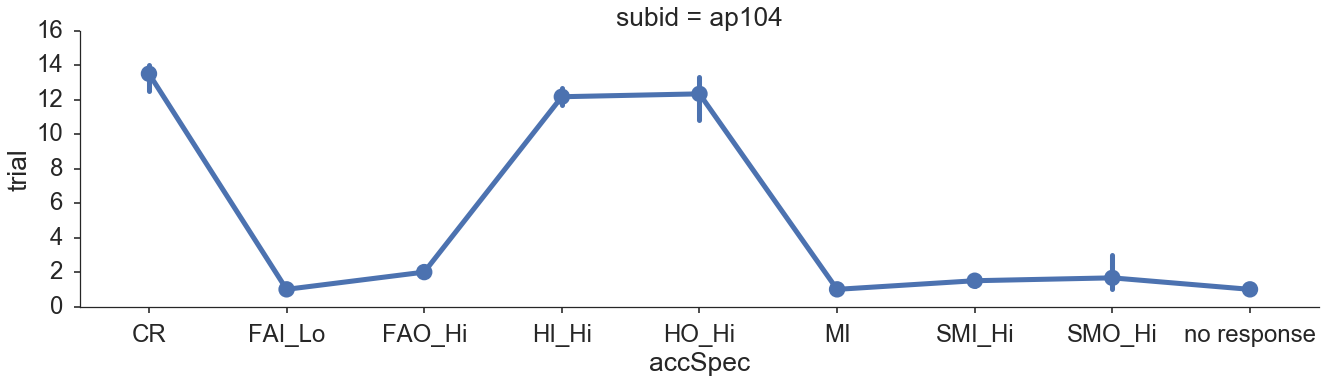

In [93]:
data = dt.groupby(['subid', 'group', 'run', 'accSpec']).count().reset_index()
sns.factorplot(x='accSpec', y='trial', col='subid', col_wrap=4, aspect=3, size=6,
               kind='point',
               data=data.query('subid == "ap104"'))

In [94]:
dsub = dt[(dt.subid == subid)]
ddesign = pd.DataFrame({'run': dsub.run,
                        'condition': dsub.onset_code,
                        'onset': dsub.onset_adj,
                        'duration': 1,
                        'value': 1})

In [95]:
ddesign.head()

,condition,duration,onset,run,value
11537,itemhit,1,0.0251,1,1
11538,sourcehit,1,11.3290,1,1
11539,sourcehit,1,21.3524,1,1
11540,sourcehit,1,33.6991,1,1
11541,sourcehit,1,42.8297,1,1


## Look at RTs as a function of reps

In [96]:
dt.head()

,run,trial,onset,duration,shockCond,shockTrial,target,associate,resp,acc,...,sleep,cond_orig,cond,reps,shock_and_post,conf,onset_adj,mem_conditions,obj_conditions,onset_code
0,1,1,12.0191,10.6661,safe,0,BANDIT,cemetery,indoor,SM,...,4.5,TO_4,outdoor,4,0.0,Hi,0.0191,sourcemiss_hi,old,itemhit
1,1,2,22.7129,9.1242,safe,0,WALRUS,foil,foil,CR,...,4.5,F_0,foil,0,0.0,N,10.7129,CR,new,CR
2,1,3,31.8642,9.4224,safe,0,VIOLIN,throne_room,indoor,H,...,4.5,TI_2,indoor,2,0.0,Hi,19.8642,sourcehit,old,sourcehit
3,1,4,41.3132,11.3389,safe,0,MEDAL,hayfield,outdoor,H,...,4.5,TO_2,outdoor,2,0.0,Hi,29.3132,sourcehit,old,sourcehit
4,1,5,52.6786,9.7644,safe,0,MANURE,canyon,outdoor,H,...,4.5,TO_2,outdoor,2,0.0,Hi,40.6786,sourcehit,old,sourcehit


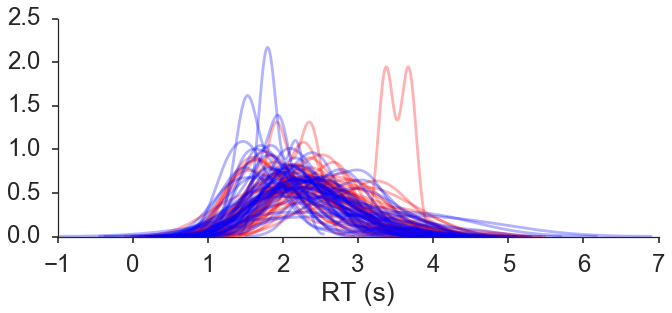

In [97]:
data = dt
condition = 'sourcehit'
reps = ['2', '4']

r = len(subj_info.subid)
fig, ax = plt.subplots(1,1, figsize=(10,5))

group_data = pd.DataFrame()
for rep in reps:
    for group, sub in zip(subj_info.group, subj_info.subid):

        data = dt
        data = data[(data.mem_conditions == condition) &
                    (data.reps == rep) &
                    (data.subid == sub)]

        if rep == '2':
            color = 'red'
        else:
            color = 'blue'

        sd = np.std(data.respRT)
        group_data = group_data.append({'subid': sub,
                           'group': group,
                           'reps': rep, 
                           'sd': sd}, ignore_index=True)

        if data.trial.any():
            sns.kdeplot(data.respRT, color=color, legend=False, alpha=.3)
sns.despine()
plt.xlabel('RT (s)')
plt.tight_layout()

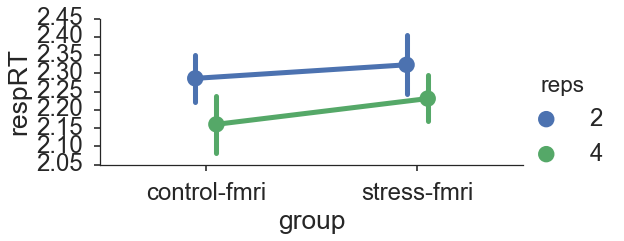

In [98]:
data = dt.groupby(['subid', 'reps', 'mem_conditions', 'group']).median().reset_index()
# data.head()
sns.factorplot(x='group', y='respRT', hue='reps', aspect=2,
               ci=68, dodge=.1, units='subid', data=data.loc[data.mem_conditions == 'sourcehit'])

## Z-score RTs within subject (across runs due to low-ish trial counts/runs for stress)

In [99]:
zscore = lambda x: (x - x.mean()) / x.std()

In [100]:
dt['rt_z'] = dt.groupby(['subid', 'mem_conditions']).respRT.transform(zscore)

## Generate onset files

In [167]:
# save for MVPA analyses with RT
dt.to_csv('/Volumes/group/awagner/sgagnon/AP/analysis/mvpa/notebooks/ap_behav.csv')

In [110]:
dt.head()

,run,trial,onset,duration,shockCond,shockTrial,target,associate,resp,acc,...,cond_orig,cond,reps,shock_and_post,conf,onset_adj,mem_conditions,obj_conditions,onset_code,rt_z
0,1,1,12.0191,10.6661,safe,0,BANDIT,cemetery,indoor,SM,...,TO_4,outdoor,4,0.0,Hi,0.0191,sourcemiss_hi,old,itemhit,-1.203880
1,1,2,22.7129,9.1242,safe,0,WALRUS,foil,foil,CR,...,F_0,foil,0,0.0,N,10.7129,CR,new,CR,-0.128675
2,1,3,31.8642,9.4224,safe,0,VIOLIN,throne_room,indoor,H,...,TI_2,indoor,2,0.0,Hi,19.8642,sourcehit,old,sourcehit,-0.746020
3,1,4,41.3132,11.3389,safe,0,MEDAL,hayfield,outdoor,H,...,TO_2,outdoor,2,0.0,Hi,29.3132,sourcehit,old,sourcehit,-0.673860
4,1,5,52.6786,9.7644,safe,0,MANURE,canyon,outdoor,H,...,TO_2,outdoor,2,0.0,Hi,40.6786,sourcehit,old,sourcehit,-1.223460


### Basic memory experiment

In [111]:
sub_list

2     ap102
3     ap103
4     ap104
5     ap105
7     ap107
9     ap109
10    ap110
11    ap111
13    ap114
14    ap115
15    ap116
16    ap117
17    ap118
18    ap119
22    ap150
25    ap153
26    ap154
31    ap159
32    ap160
33    ap161
34    ap162
35    ap163
38    ap166
39    ap167
Name: subid, dtype: object

In [112]:
dt.head()

,run,trial,onset,duration,shockCond,shockTrial,target,associate,resp,acc,...,cond_orig,cond,reps,shock_and_post,conf,onset_adj,mem_conditions,obj_conditions,onset_code,rt_z
0,1,1,12.0191,10.6661,safe,0,BANDIT,cemetery,indoor,SM,...,TO_4,outdoor,4,0.0,Hi,0.0191,sourcemiss_hi,old,itemhit,-1.203880
1,1,2,22.7129,9.1242,safe,0,WALRUS,foil,foil,CR,...,F_0,foil,0,0.0,N,10.7129,CR,new,CR,-0.128675
2,1,3,31.8642,9.4224,safe,0,VIOLIN,throne_room,indoor,H,...,TI_2,indoor,2,0.0,Hi,19.8642,sourcehit,old,sourcehit,-0.746020
3,1,4,41.3132,11.3389,safe,0,MEDAL,hayfield,outdoor,H,...,TO_2,outdoor,2,0.0,Hi,29.3132,sourcehit,old,sourcehit,-0.673860
4,1,5,52.6786,9.7644,safe,0,MANURE,canyon,outdoor,H,...,TO_2,outdoor,2,0.0,Hi,40.6786,sourcehit,old,sourcehit,-1.223460


### Break apart by sub condition

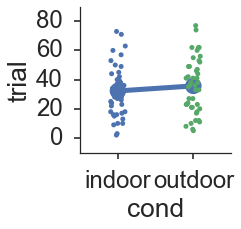

In [113]:
dsub = dt.loc[(dt.onset_code == 'sourcehit') & 
              (~dt.subid.isin(['ap151', 'ap156', 'ap106']))].groupby(['subid', 'cond']).count().reset_index()

sns.factorplot(x='cond', y='trial', units='subid', ci=68, data=dsub)
sns.stripplot(x='cond', y='trial', jitter=True, data=dsub)

In [114]:
counts = dsub.pivot(index='subid', columns='cond', values='trial').reset_index()
counts.loc[counts.subid.isin(['ap101', 'ap103', 'ap104', 'ap105', 'ap107', 'ap114', 'ap116'])].mean()

cond
indoor     59.428571
outdoor    63.285714
dtype: float64

In [115]:
counts = dsub.pivot(index='subid', columns='cond', values='trial').reset_index()
counts.loc[(counts.indoor > 50) & (counts.outdoor > 50)].subid.unique()

array(['ap103', 'ap104', 'ap105', 'ap107', 'ap116', 'ap119'], dtype=object)

In [116]:
dsub.loc[dsub.trial < 10].subid.unique()

array(['ap108', 'ap158', 'ap172', 'ap173'], dtype=object)

In [117]:
output_filename = 'AP_memory_sourcehit_bysubcond_andCR.csv'
output_dir = '/Volumes/group/awagner/sgagnon/AP/data'

for subid in subj_info.subid:
    print subid
    
    dsub = dt.loc[(dt.subid == subid) & (dt.onset_code == 'sourcehit')]

    ddesign = pd.DataFrame({'run': dsub.run,
                            'condition': dsub.cond,
                            'onset': dsub.onset_adj,
                            'duration': 0,
                            'value': 1})
    
    dsub = dt.loc[(dt.subid == subid) & (dt.onset_code == 'CR')]
    ddesign2 = pd.DataFrame({'run': dsub.run,
                             'condition': dsub.onset_code,
                             'onset': dsub.onset_adj,
                             'duration': 0,
                             'value': 1})
    ddesign = ddesign.append(ddesign2, ignore_index=True)

    
    # Add nuisance trial to very end of each run to deal w/NRs
    for run in ddesign.run.unique():
        ddesign = ddesign.append({'run': run,
                                  'condition': 'nuisance',
                                  'onset': 221*2-4, # 2 TRs from the end (221 TRs data)
                                  'duration': 4,
                                  'value': 1}, ignore_index=True)
    
    sub_output_dir = op.join(output_dir, subid, 'design')
    if not os.path.exists(sub_output_dir):
        os.makedirs(sub_output_dir)
        print 'Making directory'
    
    ddesign.to_csv(op.join(sub_output_dir, output_filename), index=False)

ap100
ap101
ap102
ap103
ap104
ap105
ap106
ap107
ap108
ap109
ap110
ap111
ap113
ap114
ap115
ap116
ap117
ap150
ap151
ap152
ap153
ap154
ap155
ap156
ap157
ap159
ap160
ap161
ap162
ap163
ap165
ap166
ap167
ap118
ap119
ap120
ap121
ap122
ap169
ap170
ap172
ap173
ap171
ap158
ap168
ap164
ap174


In [118]:
output_filename = 'AP_memory_sourcehit_bysubcond.csv'
output_dir = '/Volumes/group/awagner/sgagnon/AP/data'

for subid in subj_info.subid:
    print subid
    
    dsub = dt.loc[(dt.subid == subid) & (dt.onset_code == 'sourcehit')]

    ddesign = pd.DataFrame({'run': dsub.run,
                            'condition': dsub.cond,
                            'onset': dsub.onset_adj,
                            'duration': 0,
                            'value': 1})
    
    # Add nuisance trial to very end of each run to deal w/NRs
    for run in ddesign.run.unique():
        ddesign = ddesign.append({'run': run,
                                  'condition': 'nuisance',
                                  'onset': 221*2-4, # 2 TRs from the end (221 TRs data)
                                  'duration': 4,
                                  'value': 1}, ignore_index=True)
    
    sub_output_dir = op.join(output_dir, subid, 'design')
    if not os.path.exists(sub_output_dir):
        os.makedirs(sub_output_dir)
        print 'Making directory'
    
    ddesign.to_csv(op.join(sub_output_dir, output_filename), index=False)

ap100
ap101
ap102
ap103
ap104
ap105
ap106
ap107
ap108
ap109
ap110
ap111
ap113
ap114
ap115
ap116
ap117
ap150
ap151
ap152
ap153
ap154
ap155
ap156
ap157
ap159
ap160
ap161
ap162
ap163
ap165
ap166
ap167
ap118
ap119
ap120
ap121
ap122
ap169
ap170
ap172
ap173
ap171
ap158
ap168
ap164
ap174


In [101]:
dt.head()

,run,trial,onset,duration,shockCond,shockTrial,target,associate,resp,acc,...,cond_orig,cond,reps,shock_and_post,conf,onset_adj,mem_conditions,obj_conditions,onset_code,rt_z
0,1,1,12.0191,10.6661,safe,0,BANDIT,cemetery,indoor,SM,...,TO_4,outdoor,4,0.0,Hi,0.0191,sourcemiss_hi,old,itemhit,-1.203880
1,1,2,22.7129,9.1242,safe,0,WALRUS,foil,foil,CR,...,F_0,foil,0,0.0,N,10.7129,CR,new,CR,-0.128675
2,1,3,31.8642,9.4224,safe,0,VIOLIN,throne_room,indoor,H,...,TI_2,indoor,2,0.0,Hi,19.8642,sourcehit,old,sourcehit,-0.746020
3,1,4,41.3132,11.3389,safe,0,MEDAL,hayfield,outdoor,H,...,TO_2,outdoor,2,0.0,Hi,29.3132,sourcehit,old,sourcehit,-0.673860
4,1,5,52.6786,9.7644,safe,0,MANURE,canyon,outdoor,H,...,TO_2,outdoor,2,0.0,Hi,40.6786,sourcehit,old,sourcehit,-1.223460


### Low trial count subs (sh v CR)

In [122]:
data = dt.groupby(['subid', 'mem_conditions', 'group']).count().reset_index()

piv_trials = data.pivot_table(values='trial',index=['group', 'subid'] , columns='mem_conditions',).fillna(0)
data = pd.DataFrame(piv_trials).reset_index()
data = pd.melt(data, id_vars=['subid', 'group'], value_vars=list(dt.mem_conditions.unique()))

In [130]:
print 'Too few SHs:'
print data.query('mem_conditions == "sourcehit" & value < 6')
print '-'*30 + '\nToo few CRs:'
print data.query('mem_conditions == "CR" & value < 6')

Too few SHs:
     subid        group mem_conditions  value
118  ap151  stress-fmri      sourcehit    3.0
123  ap156  stress-fmri      sourcehit    5.0
------------------------------
Too few CRs:
Empty DataFrame
Columns: [subid, group, mem_conditions, value]
Index: []


In [131]:
data = dt.groupby(['subid', 'mem_conditions', 'group', 'run']).count().reset_index()

# do this to get the actual number per run, include zeros where no trials exist
piv_trials = data.pivot_table(values='trial',index=['group', 'subid', 'run'] , columns='mem_conditions',).fillna(0)
data = pd.DataFrame(piv_trials).reset_index()
data = pd.melt(data, id_vars=['subid', 'group', 'run'], value_vars=list(dt.mem_conditions.unique()))
data.query('mem_conditions == "sourcehit" & value < 1')

,subid,group,run,mem_conditions,value
627,ap110,control-fmri,6,sourcehit,0.0
699,ap158,control-fmri,6,sourcehit,0.0
707,ap151,stress-fmri,2,sourcehit,0.0
708,ap151,stress-fmri,3,sourcehit,0.0
710,ap151,stress-fmri,5,sourcehit,0.0
711,ap151,stress-fmri,6,sourcehit,0.0
736,ap156,stress-fmri,2,sourcehit,0.0
738,ap156,stress-fmri,4,sourcehit,0.0
740,ap156,stress-fmri,6,sourcehit,0.0
827,ap172,stress-fmri,3,sourcehit,0.0


In [132]:
d_trial_counts_perrun = data.pivot_table(values='value', index=['subid', 'group', 'run'], 
                 columns='mem_conditions').reset_index()
d_trial_counts_perrun['bad_run'] = 0
d_trial_counts_perrun.loc[d_trial_counts_perrun.CR < 1, 'bad_run'] = 1
d_trial_counts_perrun.loc[d_trial_counts_perrun.sourcehit < 1, 'bad_run'] = 1
d_trial_counts_perrun.loc[d_trial_counts_perrun.bad_run == 1].groupby(['subid']).count()

mem_conditions,group,run,CR,FA,M,itemhit_lo,nuisance,sourcehit,sourcemiss_hi,bad_run
subid,,,,,,,,,,
ap110,1,1,1,1,1,1,1,1,1,1
ap121,3,3,3,3,3,3,3,3,3,3
ap151,4,4,4,4,4,4,4,4,4,4
ap156,3,3,3,3,3,3,3,3,3,3
ap158,1,1,1,1,1,1,1,1,1,1
ap164,1,1,1,1,1,1,1,1,1,1
ap172,1,1,1,1,1,1,1,1,1,1
ap173,3,3,3,3,3,3,3,3,3,3


### Breaking down by shockcond

In [133]:
data = dt.groupby(['subid', 'mem_conditions', 'group', 'shockCond']).count().reset_index()

# do this to get the actual number per run, include zeros where no trials exist
piv_trials = data.pivot_table(values='trial',index=['group', 'subid', 'shockCond'] , columns='mem_conditions',).fillna(0)
data = pd.DataFrame(piv_trials).reset_index()
data = pd.melt(data, id_vars=['subid', 'group', 'shockCond'], value_vars=list(dt.mem_conditions.unique()))

In [134]:
data.query('mem_conditions == "sourcehit" & value < 6')

,subid,group,shockCond,mem_conditions,value
232,ap158,control-fmri,safe,sourcehit,5.0
236,ap151,stress-fmri,safe,sourcehit,2.0
237,ap151,stress-fmri,threat,sourcehit,1.0
246,ap156,stress-fmri,safe,sourcehit,0.0
247,ap156,stress-fmri,threat,sourcehit,5.0
279,ap173,stress-fmri,threat,sourcehit,1.0


In [106]:
data.query('mem_conditions == "sourcehit" & value < 5')

,subid,group,shockCond,mem_conditions,value
236,ap151,stress-fmri,safe,sourcehit,2.0
237,ap151,stress-fmri,threat,sourcehit,1.0
246,ap156,stress-fmri,safe,sourcehit,0.0
279,ap173,stress-fmri,threat,sourcehit,1.0


In [135]:
data.query('mem_conditions == "CR" & value < 6')

,subid,group,shockCond,mem_conditions,value
135,ap121,control-fmri,threat,CR,1.0
166,ap164,stress-fmri,safe,CR,5.0


In [107]:
data.query('mem_conditions == "CR" & value < 5')

,subid,group,shockCond,mem_conditions,value
135,ap121,control-fmri,threat,CR,1.0


In [110]:
data = dt.groupby(['subid', 'mem_conditions', 'group', 'run', 'shockCond']).count().reset_index()

# do this to get the actual number per run, include zeros where no trials exist
piv_trials = data.pivot_table(values='trial',index=['group', 'subid', 'run', 'shockCond'] , columns='mem_conditions',).fillna(0)
data = pd.DataFrame(piv_trials).reset_index()
data = pd.melt(data, id_vars=['subid', 'group', 'run', 'shockCond'], value_vars=list(dt.mem_conditions.unique()))
data.query('mem_conditions == "sourcehit" & value < 1')

,subid,group,run,shockCond,mem_conditions,value
627,ap110,control-fmri,6,safe,sourcehit,0.0
699,ap158,control-fmri,6,safe,sourcehit,0.0
707,ap151,stress-fmri,2,threat,sourcehit,0.0
708,ap151,stress-fmri,3,safe,sourcehit,0.0
710,ap151,stress-fmri,5,safe,sourcehit,0.0
711,ap151,stress-fmri,6,threat,sourcehit,0.0
736,ap156,stress-fmri,2,safe,sourcehit,0.0
738,ap156,stress-fmri,4,safe,sourcehit,0.0
740,ap156,stress-fmri,6,safe,sourcehit,0.0
827,ap172,stress-fmri,3,threat,sourcehit,0.0


In [111]:
data.query('mem_conditions == "CR" & value < 1')

,subid,group,run,shockCond,mem_conditions,value
404,ap121,control-fmri,4,threat,CR,0.0
405,ap121,control-fmri,5,safe,CR,0.0
406,ap121,control-fmri,6,threat,CR,0.0
500,ap164,stress-fmri,5,threat,CR,0.0


#### Find bad runs (zero for SH or CR)

In [119]:
d_trial_counts_perrun = data.pivot_table(values='value', index=['subid', 'group', 'run', 'shockCond'], 
                 columns='mem_conditions').reset_index()
d_trial_counts_perrun['bad_run'] = 0
d_trial_counts_perrun.loc[d_trial_counts_perrun.CR < 1, 'bad_run'] = 1
d_trial_counts_perrun.loc[d_trial_counts_perrun.sourcehit < 1, 'bad_run'] = 1
d_trial_counts_perrun.loc[d_trial_counts_perrun.bad_run == 1].groupby(['subid', 'shockCond']).count()

mem_conditions   group  run  CR  FA  M  itemhit_lo  nuisance  sourcehit  \
subid shockCond                                                           
ap110 safe           1    1   1   1  1           1         1          1   
ap121 safe           1    1   1   1  1           1         1          1   
      threat         2    2   2   2  2           2         2          2   
ap151 safe           2    2   2   2  2           2         2          2   
      threat         2    2   2   2  2           2         2          2   
ap156 safe           3    3   3   3  3           3         3          3   
ap158 safe           1    1   1   1  1           1         1          1   
ap164 threat         1    1   1   1  1           1         1          1   
ap172 threat         1    1   1   1  1           1         1          1   
ap173 safe           1    1   1   1  1           1         1          1   
      threat         2    2   2   2  2           2         2          2   

mem_conditions   sourcemiss_hi  bad_run  
subid shockCond                          
ap110 safe                   1        1  
ap121 safe                   1        1  
      threat                 2        2  
ap151 safe                   2        2  
      threat                 2        2  
ap156 safe                   3        3  
ap158 safe                   1        1  
ap164 threat                 1        1  
ap172 threat                 1        1  
ap173 safe                   1        1  
      threat                 2        2

In [124]:
data.query('mem_conditions == "itemhit_lo" & value < 1')

,subid,group,run,shockCond,mem_conditions,value
1424,ap103,control-fmri,2,threat,itemhit_lo,0.0
1429,ap104,control-fmri,1,threat,itemhit_lo,0.0
1430,ap104,control-fmri,2,safe,itemhit_lo,0.0
1431,ap104,control-fmri,3,threat,itemhit_lo,0.0
1432,ap104,control-fmri,4,safe,itemhit_lo,0.0
1433,ap104,control-fmri,5,threat,itemhit_lo,0.0
1434,ap104,control-fmri,6,safe,itemhit_lo,0.0
1495,ap116,control-fmri,1,threat,itemhit_lo,0.0
1496,ap116,control-fmri,2,safe,itemhit_lo,0.0
1498,ap116,control-fmri,4,safe,itemhit_lo,0.0


In [173]:
dt.loc[(dt.subid == 'ap160') & (dt.target == 'WHIP')]

,run,trial,onset,duration,shockCond,shockTrial,target,associate,resp,acc,...,reps,shock_and_post,conf,onset_adj,mem_conditions,obj_conditions,onset_code,rt_z,mem_conditions_byrep,onset_code_byrep
6677,5,13,141.3117,11.5306,threat,1,WHIP,ocean,outdoor,H,...,4,2.0,Hi,129.3117,nuisance,nuisance,nuisance,-3.136573,nuisance-4,nuisance-4


In [125]:
output_filename = 'AP_memory_byshockCond.csv'
output_dir = '/Volumes/group/awagner/sgagnon/AP/data'

for subid in subj_info.subid:
    print subid
    
    dsub = dt[(dt.subid == subid)]

    ddesign = pd.DataFrame({'run': dsub.run,
                            'condition': dsub.mem_conditions + '_' + dsub.shockCond,
                            'onset': dsub.onset_adj,
                            'duration': 0,
                            'value': 1})
    
    # convert nuisance just to nuisance, regardless of block type
    ddesign.loc[ddesign.condition.isin(['nuisance_safe', 'nuisance_threat']), 'condition'] = 'nuisance'
    
    # Add nuisance trial to very end of each run to deal w/NRs
    for run in ddesign.run.unique():
        ddesign = ddesign.append({'run': run,
                                  'condition': 'nuisance',
                                  'onset': 221*2-4, # 2 TRs from the end (221 TRs data)
                                  'duration': 4,
                                  'value': 1}, ignore_index=True)
    
    sub_output_dir = op.join(output_dir, subid, 'design')
    if not os.path.exists(sub_output_dir):
        os.makedirs(sub_output_dir)
        print 'Making directory'
    
    ddesign.to_csv(op.join(sub_output_dir, output_filename), index=False)

ap100
ap101
ap102
ap103
ap104
ap105
ap106
ap107
ap108
ap109
ap110
ap111
ap113
ap114
ap115
ap116
ap117
ap150
ap151
ap152
ap153
ap154
ap155
ap156
ap157
ap159
ap160
ap161
ap162
ap163
ap165
ap166
ap167
ap118
ap119
ap120
ap121
ap122
ap169
ap170
ap172
ap173
ap171
ap158
ap168
ap164
ap174


In [126]:
output_filename = 'AP_memory.csv'
output_dir = '/Volumes/group/awagner/sgagnon/AP/data'

for subid in subj_info.subid:
    print subid
    
    dsub = dt[(dt.subid == subid)]

    ddesign = pd.DataFrame({'run': dsub.run,
                            'condition': dsub.onset_code,
                            'onset': dsub.onset_adj,
                            'duration': 0,
                            'value': 1})
    
    # Add nuisance trial to very end of each run to deal w/NRs
    for run in ddesign.run.unique():
        ddesign = ddesign.append({'run': run,
                                  'condition': 'nuisance',
                                  'onset': 221*2-4, # 2 TRs from the end (221 TRs data)
                                  'duration': 4,
                                  'value': 1}, ignore_index=True)
    
    sub_output_dir = op.join(output_dir, subid, 'design')
    if not os.path.exists(sub_output_dir):
        os.makedirs(sub_output_dir)
        print 'Making directory'
    
    ddesign.to_csv(op.join(sub_output_dir, output_filename), index=False)

ap100
ap101
ap102
ap103
ap104
ap105
ap106
ap107
ap108
ap109
ap110
ap111
ap113
ap114
ap115
ap116
ap117
ap150
ap151
ap152
ap153
ap154
ap155
ap156
ap157
ap159
ap160
ap161
ap162
ap163
ap165
ap166
ap167
ap118
ap119
ap120
ap121
ap122
ap169
ap170
ap172
ap173
ap171
ap158
ap168
ap164
ap174


In [127]:
output_filename = 'AP_memory_itemhits.csv'
output_dir = '/Volumes/group/awagner/sgagnon/AP/data'

for subid in subj_info.subid:
    print subid
    
    dsub = dt[(dt.subid == subid)]

    ddesign = pd.DataFrame({'run': dsub.run,
                            'condition': dsub.mem_conditions,
                            'onset': dsub.onset_adj,
                            'duration': 0,
                            'value': 1})
    
    # Add nuisance trial to very end of each run to deal w/NRs
    for run in ddesign.run.unique():
        ddesign = ddesign.append({'run': run,
                                  'condition': 'nuisance',
                                  'onset': 221*2-4, # 2 TRs from the end (221 TRs data)
                                  'duration': 4,
                                  'value': 1}, ignore_index=True)
    
    sub_output_dir = op.join(output_dir, subid, 'design')
    if not os.path.exists(sub_output_dir):
        os.makedirs(sub_output_dir)
        print 'Making directory'
    
    ddesign.to_csv(op.join(sub_output_dir, output_filename), index=False)

ap100
ap101
ap102
ap103
ap104
ap105
ap106
ap107
ap108
ap109
ap110
ap111
ap113
ap114
ap115
ap116
ap117
ap150
ap151
ap152
ap153
ap154
ap155
ap156
ap157
ap159
ap160
ap161
ap162
ap163
ap165
ap166
ap167
ap118
ap119
ap120
ap121
ap122
ap169
ap170
ap172
ap173
ap171
ap158
ap168
ap164
ap174


### Add in logit regressor

See code in AP_split-by-mem

### Add in RT regressor for sourcehits

In [128]:
output_filename = 'AP_memory_itemhits_rt.csv'
output_dir = '/Volumes/group/awagner/sgagnon/AP/data'

for subid in subj_info.subid:
    print subid
    
    dsub = dt[(dt.subid == subid)]

    ddesign = pd.DataFrame({'run': dsub.run,
                            'condition': dsub.mem_conditions,
                            'onset': dsub.onset_adj,
                            'duration': 0,
                            'value': 1})
    
    sourcehits = dsub.loc[dsub.mem_conditions == 'sourcehit']
    sourcehits = pd.DataFrame({'run': sourcehits.run,
                              'condition': sourcehits.mem_conditions + '_rt',
                              'onset': sourcehits.onset_adj,
                              'duration': 0,
                              'value': sourcehits.rt_z})
    ddesign = ddesign.append(sourcehits, ignore_index=True)
    
    # Add nuisance trial to very end of each run to deal w/NRs
    for run in ddesign.run.unique():
        ddesign = ddesign.append({'run': run,
                                  'condition': 'nuisance',
                                  'onset': 221*2-4, # 2 TRs from the end (221 TRs data)
                                  'duration': 4,
                                  'value': 1}, ignore_index=True)
    
    sub_output_dir = op.join(output_dir, subid, 'design')
    if not os.path.exists(sub_output_dir):
        os.makedirs(sub_output_dir)
        print 'Making directory'
    
    ddesign.to_csv(op.join(sub_output_dir, output_filename), index=False)

ap100
ap101
ap102
ap103
ap104
ap105
ap106
ap107
ap108
ap109
ap110
ap111
ap113
ap114
ap115
ap116
ap117
ap150
ap151
ap152
ap153
ap154
ap155
ap156
ap157
ap159
ap160
ap161
ap162
ap163
ap165
ap166
ap167
ap118
ap119
ap120
ap121
ap122
ap169
ap170
ap172
ap173
ap171
ap158
ap168
ap164
ap174


In [129]:
output_filename = 'AP_sourcehits-vs-CR.csv'
output_dir = '/Volumes/group/awagner/sgagnon/AP/data'

for subid in subj_info.subid:
    print subid
    
    dsub = dt[(dt.subid == subid) & (dt.onset_code.isin(['sourcehit', 'CR']))]

    ddesign = pd.DataFrame({'run': dsub.run,
                            'condition': dsub.onset_code,
                            'onset': dsub.onset_adj,
                            'duration': 0,
                            'value': 1})
    
    # covert CRs to negative
    ddesign.loc[ddesign.condition == 'CR', 'value'] = ddesign.loc[ddesign.condition == 'CR', 'value'] * -1
    
    # now rename all conditions of interest
    ddesign.loc[:, 'condition'] = 'sourcehit-vs-CR'
    
    # Add nuisance trial to very end of each run to deal w/NRs
    for run in ddesign.run.unique():
        ddesign = ddesign.append({'run': run,
                                  'condition': 'nuisance',
                                  'onset': 221*2-4, # 2 TRs from the end (221 TRs data)
                                  'duration': 4,
                                  'value': 1}, ignore_index=True)
    
    sub_output_dir = op.join(output_dir, subid, 'design')
    if not os.path.exists(sub_output_dir):
        os.makedirs(sub_output_dir)
        print 'Making directory'
    
    ddesign.to_csv(op.join(sub_output_dir, output_filename), index=False)

ap100
ap101
ap102
ap103
ap104
ap105
ap106
ap107
ap108
ap109
ap110
ap111
ap113
ap114
ap115
ap116
ap117
ap150
ap151
ap152
ap153
ap154
ap155
ap156
ap157
ap159
ap160
ap161
ap162
ap163
ap165
ap166
ap167
ap118
ap119
ap120
ap121
ap122
ap169
ap170
ap172
ap173
ap171
ap158
ap168
ap164
ap174


### Split by study reps (for mvpa)

In [130]:
dt['mem_conditions_byrep'] = dt.mem_conditions + '-' + dt.reps.map(str)

In [131]:
output_filename = 'AP_memory_itemhits_byrep.csv'
output_dir = '/Volumes/group/awagner/sgagnon/AP/data'

for subid in subj_info.subid:
    print subid
    
    dsub = dt[(dt.subid == subid)]

    ddesign = pd.DataFrame({'run': dsub.run,
                            'condition': dsub.mem_conditions_byrep,
                            'onset': dsub.onset_adj,
                            'duration': 0,
                            'value': 1})
    
    # Add nuisance trial to very end of each run to deal w/NRs
    for run in ddesign.run.unique():
        ddesign = ddesign.append({'run': run,
                                  'condition': 'nuisance',
                                  'onset': 221*2-4, # 2 TRs from the end (221 TRs data)
                                  'duration': 4,
                                  'value': 1}, ignore_index=True)
    
    sub_output_dir = op.join(output_dir, subid, 'design')
    if not os.path.exists(sub_output_dir):
        os.makedirs(sub_output_dir)
        print 'Making directory'
    
    ddesign.to_csv(op.join(sub_output_dir, output_filename), index=False)

ap100
ap101
ap102
ap103
ap104
ap105
ap106
ap107
ap108
ap109
ap110
ap111
ap113
ap114
ap115
ap116
ap117
ap150
ap151
ap152
ap153
ap154
ap155
ap156
ap157
ap159
ap160
ap161
ap162
ap163
ap165
ap166
ap167
ap118
ap119
ap120
ap121
ap122
ap169
ap170
ap172
ap173
ap171
ap158
ap168
ap164
ap174


### Basic memory, split by study reps (for mvpa)

In [132]:
dt['onset_code_byrep'] = dt.onset_code + '-' + dt.reps.map(str)
dt.head()

,run,trial,onset,duration,shockCond,shockTrial,target,associate,resp,acc,...,reps,shock_and_post,conf,onset_adj,mem_conditions,obj_conditions,onset_code,rt_z,mem_conditions_byrep,onset_code_byrep
0,1,1,12.0191,10.6661,safe,0,BANDIT,cemetery,indoor,SM,...,4,0.0,Hi,0.0191,sourcemiss_hi,old,itemhit,-1.203880,sourcemiss_hi-4,itemhit-4
1,1,2,22.7129,9.1242,safe,0,WALRUS,foil,foil,CR,...,0,0.0,N,10.7129,CR,new,CR,-0.128675,CR-0,CR-0
2,1,3,31.8642,9.4224,safe,0,VIOLIN,throne_room,indoor,H,...,2,0.0,Hi,19.8642,sourcehit,old,sourcehit,-0.746020,sourcehit-2,sourcehit-2
3,1,4,41.3132,11.3389,safe,0,MEDAL,hayfield,outdoor,H,...,2,0.0,Hi,29.3132,sourcehit,old,sourcehit,-0.673860,sourcehit-2,sourcehit-2
4,1,5,52.6786,9.7644,safe,0,MANURE,canyon,outdoor,H,...,2,0.0,Hi,40.6786,sourcehit,old,sourcehit,-1.223460,sourcehit-2,sourcehit-2


In [133]:
output_filename = 'AP_memory_byreps.csv'
output_dir = '/Volumes/group/awagner/sgagnon/AP/data'

for subid in subj_info.subid:
    print subid
    
    dsub = dt[(dt.subid == subid)]

    ddesign = pd.DataFrame({'run': dsub.run,
                            'condition': dsub.onset_code_byrep,
                            'onset': dsub.onset_adj,
                            'duration': 0,
                            'value': 1})
    
    # Add nuisance trial to very end of each run to deal w/NRs
    for run in ddesign.run.unique():
        ddesign = ddesign.append({'run': run,
                                  'condition': 'nuisance',
                                  'onset': 221*2-4, # 2 TRs from the end (221 TRs data)
                                  'duration': 4,
                                  'value': 1}, ignore_index=True)
    
    sub_output_dir = op.join(output_dir, subid, 'design')
    if not os.path.exists(sub_output_dir):
        os.makedirs(sub_output_dir)
        print 'Making directory'
    
    ddesign.to_csv(op.join(sub_output_dir, output_filename), index=False)

ap100
ap101
ap102
ap103
ap104
ap105
ap106
ap107
ap108
ap109
ap110
ap111
ap113
ap114
ap115
ap116
ap117
ap150
ap151
ap152
ap153
ap154
ap155
ap156
ap157
ap159
ap160
ap161
ap162
ap163
ap165
ap166
ap167
ap118
ap119
ap120
ap121
ap122
ap169
ap170
ap172
ap173
ap171
ap158
ap168
ap164
ap174
